In [1]:
import pandas as pd

# Read & Write

In [ ]:
# Reading CSV
df_csv = pd.read_csv('your_file.csv')

# Writing to CSV
df_csv.to_csv('output_file.csv', index=False)

In [2]:
# Reading CSV with all specified parameters

df_csv = pd.read_csv(
    'example.csv',
    delimiter = '|',
    header = None, # Indicates that the file has no header row.
    # header = 0 # Treats the first row (index 0) of the file as the header.
    # header = 2  # Uses the third row (index 2) as the header.
    # header = [0, 1]  # Uses the first two rows as a multi-level header.

    names = ['ID', 'FirstName', 'LastName', 'Age'], # name of columns
    index_col = 'ID', # specifying index
    usecols = ['ID', 'FirstName', 'Age'] # only read these columns
)

df_csv

,FirstName,Age
ID,,
1,John,30
2,Jane,25
3,Emily,22


In [ ]:
# Reading JSON
df_json = pd.read_json('your_file.json')

# Writing to JSON
df_json.to_json('output_file.json', orient='records')

In [ ]:
# Reading Excel
df_excel = pd.read_excel('your_file.xlsx', sheet_name='sheet1')

# Writing to Excel
df_excel.to_excel('output_file.xlsx', index=False, sheet_name='sheet1')

In [ ]:
import sqlite3  
con = sqlite3.connect("database.db")  

df = pd.read_sql_query("SELECT * FROM information", con)  

# Series()

- A Pandas Series is like a column in a table.
- It is a one-dimensional array holding data of any type.

In [3]:
import pandas as pd

a = [1, 7, 2]
myvar = pd.Series(a)
myvar

0    1
1    7
2    2
dtype: int64

In [4]:
myvar = pd.Series(a, index = ["x", "y", "z"])
myvar

x    1
y    7
z    2
dtype: int64

In [5]:
myvar['y']

np.int64(7)

In [6]:
myvar = pd.Series(a, name='col', index = ["x", "y", "z"]) # 'col' will be column name when convert it into df
myvar

x    1
y    7
z    2
Name: col, dtype: int64

In [6]:
# You can also use a key/value object, like a dictionary, when creating a Series.

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)
myvar

day1    420
day2    380
day3    390
dtype: int64

In [7]:
# To select only some of the items in the dictionary, 
# use the index argument and specify only the items you want to include in the Series.

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories, index = ["day1", "day2"])
myvar

day1    420
day2    380
dtype: int64

In [8]:
# We can create Series by using various inputs: Array, Dict, Scalar value
import numpy as np

# array
info = np.array(['P','a','n','d','a','s'])  
a = pd.Series(info)  
print(a)  

# dictinary
info = {'x' : 0., 'y' : 1., 'z' : 2.}  
a = pd.Series(info)  
print (a)  

# scaler value
x = pd.Series(4, index=[0, 1, 2, 3])  
print (x) 

0    P
1    a
2    n
3    d
4    a
5    s
dtype: object
x    0.0
y    1.0
z    2.0
dtype: float64
0    4
1    4
2    4
3    4
dtype: int64


**Important Series functions are: `to_frame()`, `unique()`, `value_counts()`**

# to_frame()

The Pandas `Series.to_frame()` function is used to convert the series object to the DataFrame

In [9]:
series = pd.Series(["a", "b", "c"],  name="vals")  
series

0    a
1    b
2    c
Name: vals, dtype: object

In [10]:
series.to_frame() 

,vals
0,a
1,b
2,c


# unique()

The `unique()` function in pandas is used to find the unique elements in a Series. It returns an array of unique values in the order of their appearance. This function is often used to identify unique values in a particular column of a DataFrame.

In [2]:
# Create a sample DataFrame
data = {'Column1': ['A', 'B', 'C', 'A', 'B', 'D'],
       'Column2': ['a', 'b', 'c', 'a', 'b', 'd']}
df = pd.DataFrame(data)

# Find unique values in a column
df['Column1'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [3]:
df.unique() # ERROR: not applied on df 

AttributeError: 'DataFrame' object has no attribute 'unique'

# value_counts()

The `value_counts()` function in pandas is used to count the occurrences of unique values in a Series. It returns a Series containing counts of unique values, sorted in descending order.

In [48]:
# Create a sample DataFrame
data = {'Column1': ['A', 'B', 'C', 'A', 'B', 'D']}
df = pd.DataFrame(data)

# Count the occurrences of unique values in a column
df['Column1'].value_counts()

Column1
A    2
B    2
C    1
D    1
Name: count, dtype: int64

In [49]:
df.value_counts()

Column1
A          2
B          2
C          1
D          1
Name: count, dtype: int64

In [14]:
# Create a sample DataFrame
data = {'Column1': ['A', 'B', 'C', 'A', 'B', 'D'],
       'Column2': ['1', '3', '2', '2', '7', '9']
       }

df = pd.DataFrame(data)
df

,Column1,Column2
0,A,1
1,B,3
2,C,2
3,A,2
4,B,7
5,D,9


In [15]:
df.value_counts()

Column1  Column2
A        1          1
         2          1
B        3          1
         7          1
C        2          1
D        9          1
Name: count, dtype: int64

**With Normalization (normalize=True)**

In [1]:
import pandas as pd

df = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Apple', 'Orange', 'Banana', 'Apple']})

counts = df['Fruit'].value_counts()  # Default: counts
counts

Fruit
Apple     3
Banana    2
Orange    1
Name: count, dtype: int64

In [2]:
normalized_counts = df['Fruit'].value_counts(normalize=True)
normalized_counts

Fruit
Apple     0.500000
Banana    0.333333
Orange    0.166667
Name: proportion, dtype: float64

**Explanation:**

- "Apple" makes up 50% (3 out of 6).
- "Banana" makes up 33.33% (2 out of 6).
- "Orange" makes up 16.67% (1 out of 6).

**Use Cases of normalize=True**
- Helps analyze how data is distributed proportionally instead of raw counts.
- Normalized values allow comparison between datasets of different sizes.
- Useful in machine learning when creating categorical probability distributions.

# nunique()

The `nunique()` function in Pandas is used to count the number of unique values in a DataFrame or Series. It helps to understand how many distinct elements exist in a particular column or across columns.

In [1]:
import pandas as pd

data = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles']}
df = pd.DataFrame(data)

unique_count = df['City'].nunique()
print(unique_count)

3


In [2]:
data = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles'],
        'Age': [25, 30, 25, 35, 30]}

df = pd.DataFrame(data)

unique_counts = df.nunique()
print(unique_counts)

City    3
Age     3
dtype: int64


In [3]:
unique_in_rows = df.nunique(axis=1)
print(unique_in_rows)

0    2
1    2
2    2
3    2
4    2
dtype: int64


In [4]:
data_with_nan = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago', None]}
df_nan = pd.DataFrame(data_with_nan)

unique_count_incl_nan = df_nan['City'].nunique(dropna=False)
print(unique_count_incl_nan)

4


# DataFrame()

- Data sets in Pandas are usually multi-dimensional tables, called DataFrames.
- Series is like a column, a DataFrame is the whole table.

In [50]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


In [51]:
# With the index argument, you can name your own indexes.

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
df

,calories,duration
day1,420,50
day2,380,40
day3,390,45


**Different ways to create DataFrame:**

In [52]:
# Dictionary of Lists

data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [53]:
# Dictionary of Dictionaries

data = {
    'A': {0: 1, 1: 2, 2: 3},
    'B': {0: 4, 1: 5, 2: 6},
    'C': {0: 7, 1: 8, 2: 9}
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [54]:
# From a List of Dictionaries

data = [
    {'A': 1, 'B': 4, 'C': 7},
    {'A': 2, 'B': 5, 'C': 8},
    {'A': 3, 'B': 6, 'C': 9}
]
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [55]:
# From a List of Lists (with column names)

data = [
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
]
columns = ['A', 'B', 'C']
df = pd.DataFrame(data, columns=columns)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [56]:
# From a NumPy Array

import numpy as np

data = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
])
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
# From a SQL Query

import sqlite3

# Assuming you have a SQLite database and a table named 'table_name'
conn = sqlite3.connect('database.db')
query = "SELECT * FROM table_name"
df = pd.read_sql_query(query, conn)
print(df)


In [60]:
# From Another DataFrame

df_original = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
df_copy = df_original.copy() # Changes made to the original DataFrame or the copied DataFrame do not affect each other
df_copy

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [16]:
# From Single Series

series = pd.Series([1, 2, 3], name='A')
df = series.to_frame()
print(df)

print("--------------")
# From Multiple Series

series1 = pd.Series([1, 2, 3], name='A')
series2 = pd.Series([4, 5, 6], name='B')
df = pd.concat([series1, series2], axis=1)
print(df)


   A
0  1
1  2
2  3
--------------
   A  B
0  1  4
1  2  5
2  3  6


In [62]:
df = pd.read_csv('data.csv')

print(df.to_string()) # use to_string() to print the entire DataFrame.

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

# loc

- `loc` is label-based indexing, meaning it is used to access rows and columns based on their index labels or row labels. The syntax for using loc is:

- `df.loc[row_label, column_label]`

- Here, row_label can be either a single label, a list of labels, or a slice of labels. Similarly, column_label can be either a single label, a list of labels, or a slice of labels. It returns a view of the data from the DataFrame that matches the specified labels.

- The `DataFrame.loc[]` is used to retrieve the group of rows and columns by labels or a boolean array in the DataFrame. It takes only index labels, and if it exists in the caller DataFrame, it returns the rows, columns, or DataFrame.

The allowed inputs for `.loc[]` are:

- Single label, e.g.,7 or a. Here, 7 is interpreted as the label of the index.
- List or array of labels, e.g. `['x', 'y', 'z']`.
- Slice object with labels, e.g. `'x':'f'`.
- A boolean array of the same length. e.g. `[True, True, False]`.
- callable function with one argument.

**NOTE**: `loc` includes last index data

In [63]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 27],
        'City': ['New York', 'London', 'Paris', 'Tokyo']}

df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris
3,David,27,Tokyo


In [64]:
# Access a single row using the row label
row_data = df.loc[1]
row_data

Name       Bob
Age         30
City    London
Name: 1, dtype: object

In [65]:
# Access multiple rows using a list of row labels
multiple_rows = df.loc[[0, 2]]
multiple_rows

,Name,Age,City
0,Alice,25,New York
2,Charlie,22,Paris


In [66]:
# Access multiple rows using range row labels
multiple_rows_range = df.loc[0:3] # loc does include last index, but iloc not
multiple_rows_range

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris
3,David,27,Tokyo


In [67]:
# Access a single element using both row and column labels
element = df.loc[1, 'City']
element

'London'

In [68]:
# Access a multiple element using both row and column labels
multiple_element = df.loc[[1,3],['Name', 'Age']]
multiple_element

,Name,Age
1,Bob,30
3,David,27


# iloc

- `iloc` is integer-location based indexing, used to access rows and columns based on their integer positions in the DataFrame. The syntax for using iloc is:

- `df.iloc[row_position, column_position]`

- Here, row_position and column_position can be either a single integer, a list of integers, or a slice of integers. It returns a view of the data from the DataFrame that matches the specified integer positions..

- The `DataFrame.iloc[]` is used when the index label of the DataFrame is other than numeric series of 0,1,2,....,n or in the case when the user does not know the index label.

- We can extract the rows by using an imaginary index position which is not visible in the DataFrame. It is an integer- based position(from 0 to length-1 of the axis), but may also be used with the boolean array.

The allowed inputs for `.iloc[]` are:

- Integer value, e.g. 7.
- List or array of integers, e.g [2, 5, 6].
- Slice object with ints, e.g., 1:9.
- boolean array.
- A callable function with one argument that can be the calling Series or the DataFrame. It returns valid outputs for indexing.

**NOTE**: `iloc` does not includes last index data

In [69]:
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris
3,David,27,Tokyo


In [70]:
# Access a single row using the row position
row_data = df.iloc[1]
row_data

Name       Bob
Age         30
City    London
Name: 1, dtype: object

In [71]:
# Access multiple rows using a list of row positions
multiple_rows = df.iloc[[0, 2]]
multiple_rows

,Name,Age,City
0,Alice,25,New York
2,Charlie,22,Paris


In [72]:
# Access multiple rows using range of row positions
multiple_rows_range = df.iloc[0:3] # iloc doest not include last index, but loc does
multiple_rows_range

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris


In [73]:
# Access a single element using both row and column positions
element = df.iloc[1, 2]
element

'London'

# copy()

- The df.copy() method in Pandas creates a deep copy of the DataFrame by default, but you can also create a shallow copy explicitly by using the deep=False parameter.

**Deep copy:**

    - When df.copy() is called without any arguments (or with deep=True), it creates a new DataFrame object with a completely independent copy of the data.
    - Changes made to the original DataFrame or the copied DataFrame do not affect each other.

In [7]:
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_copy = df.copy()

df_copy.loc[0, 'A'] = 10
print(df)       # Original DataFrame remains unchanged
print(df_copy)  # Modified copy

   A  B
0  1  3
1  2  4
    A  B
0  10  3
1   2  4


**Shallow Copy (deep=False):**

    - When deep=False is passed, a shallow copy is created.
    - The shallow copy only copies references to the original data and does not copy the data itself. Changes to mutable elements (like arrays or objects) in either DataFrame can affect the other.

In [8]:
df_shallow_copy = df.copy(deep=False)

df_shallow_copy.loc[0, 'A'] = 10
print(df)       # Original DataFrame reflects changes
print(df_shallow_copy)  # Modified shallow copy

    A  B
0  10  3
1   2  4
    A  B
0  10  3
1   2  4


# head(), tail(), sample()

- These methods allow you to quickly inspect the first few rows (`head`) or the last few rows (`tail`) of your DataFrame to get a sense of the data.
- The `sample()` function is used to randomly sample data from a DataFrame in pandas. 

In [74]:
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris
3,David,27,Tokyo


In [75]:
df.head(3)

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris


In [76]:
df.tail(3)

,Name,Age,City
1,Bob,30,London
2,Charlie,22,Paris
3,David,27,Tokyo


In [77]:
df.sample(3)

,Name,Age,City
0,Alice,25,New York
2,Charlie,22,Paris
1,Bob,30,London


# memory_usage()

The `memory_usage()` method in Pandas is used to check the memory consumption of a DataFrame or Series. It helps optimize memory usage by identifying large columns and allows you to choose efficient data types.

In [1]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.DataFrame({
    'A': np.arange(1000),  # Integer column
    'B': np.random.rand(1000),  # Float column
    'C': ['Text'] * 1000  # String column
})

# Check memory usage
print(df.memory_usage())


Index     128
A        8000
B        8000
C        8000
dtype: int64


**✅ Explanation:**

- The Index takes 128 bytes.
- Column A (integers) takes 8000 bytes.
- Column B (floats) takes 8000 bytes.
- Column C (strings) takes 8000 bytes.

By default, Pandas does not compute the exact memory for object-type columns (dtype=object). To get an accurate measurement, use deep=True.

In [2]:
print(df.memory_usage(deep=True))

Index      128
A         8000
B         8000
C        61000
dtype: int64


In [3]:
# Total Memory Used by DataFrame
print(df.memory_usage(deep=True).sum(), "bytes")

77128 bytes


# nlargest() and nsmallest()

These methods are used to retrieve the top (largest) or bottom (smallest) n values from a DataFrame or Series.

**Syntax:** `df.nlargest(n, columns, keep='first'), df.nsmallest(n, columns, keep='first')`

- `n`: Number of rows to return.
- `columns`: The column(s) to sort by.
- `keep`: Which duplicates to keep ('first', 'last', or 'all').

In [15]:
# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Score': [85, 92, 78, 95, 88],
    'Age': [23, 25, 22, 24, 26]
})

# Get top 3 highest scores
top_3 = df.nlargest(3, 'Score')
top_3

,Name,Score,Age
3,David,95,24
1,Bob,92,25
4,Eve,88,26


In [16]:
# Get bottom 2 lowest scores
bottom_2 = df.nsmallest(2, 'Score')
bottom_2 

,Name,Score,Age
2,Charlie,78,22
0,Alice,85,23


In [17]:
# Get top 2 highest scores, breaking ties by Age
df.nlargest(2, ['Score', 'Age'])

,Name,Score,Age
3,David,95,24
1,Bob,92,25


# info()

Provides essential information about the DataFrame, including the data types, non-null counts, and memory usage. It helps you understand the structure and integrity of the data.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


# describe()

In the context of the Python library "pandas," the `describe(`) method is used to generate descriptive statistics of a DataFrame or a Series. This method provides a summary of various statistics for the numerical data contained in the DataFrame or Series. It is particularly useful for quickly getting insights into the distribution and properties of the data.

When you apply `describe()` to a DataFrame, it returns a new DataFrame containing the following statistics for each numeric column:

- Count: The number of non-missing (non-null) values in the column.
- Mean: The average value of the data in the column.
- Standard Deviation (std): A measure of how much the values in the column deviate from the mean.
- Minimum (min): The smallest value in the column.
- 25th Percentile (25%): The value below which 25% of the data falls (also known as the first quartile).
- 50th Percentile (50%) or Median: The value below which 50% of the data falls (also known as the second quartile).
- 75th Percentile (75%): The value below which 75% of the data falls (also known as the third quartile).
- Maximum (max): The largest value in the column.

If you apply `describe()` to a Series, it will return a Series with the same statistics as described above.

In [79]:
# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
}

df = pd.DataFrame(data)

# Applying describe() to the DataFrame
description = df.describe()
description

,A,B
count,5.000000,5.000000
mean,3.000000,30.000000
std,1.581139,15.811388
min,1.000000,10.000000
25%,2.000000,20.000000
50%,3.000000,30.000000
75%,4.000000,40.000000
max,5.000000,50.000000


by default, the pandas describe() method only includes numeric columns (e.g., int64, float64) and excludes non-numeric columns (such as object, category, datetime).

If the DataFrame has categorical or object-type columns, the describe() method returns: `count`, `unique`, `top`, and `freq`.

In [11]:
import pandas as pd

# Sample DataFrame
data = {'Age': [23, 45, 21, 35, 30, 50],
        'Salary': [50000, 60000, 55000, 45000, 62000, 58000],
        'Department': ['HR', 'Finance', 'IT', 'HR', 'IT', 'Finance']}

df = pd.DataFrame(data)

df.describe()

,Age,Salary
count,6.000000,6.000000
mean,34.000000,55000.000000
std,11.696153,6449.806199
min,21.000000,45000.000000
25%,24.750000,51250.000000
50%,32.500000,56500.000000
75%,42.500000,59500.000000
max,50.000000,62000.000000


In [10]:
df.describe(include=['object'])

,Department
count,6
unique,3
top,HR
freq,2


- `count`: The number of non-null values in the column.
- `unique`: The number of unique values in the column.
- `top`: The most frequently occurring value (mode).
- `frq`: The frequency (count) of the most common value.

In [12]:
# To include all columns (numeric and object types)
df.describe(include='all')

,Age,Salary,Department
count,6.000000,6.000000,6
unique,NaN,NaN,3
top,NaN,NaN,HR
freq,NaN,NaN,2
mean,34.000000,55000.000000,NaN
std,11.696153,6449.806199,NaN
min,21.000000,45000.000000,NaN
25%,24.750000,51250.000000,NaN
50%,32.500000,56500.000000,NaN
75%,42.500000,59500.000000,NaN


In [8]:
df.describe(exclude=['float']) # can specify data types to exclude. 

,Age,Salary,Department
count,6.000000,6.000000,6
unique,NaN,NaN,3
top,NaN,NaN,HR
freq,NaN,NaN,2
mean,34.000000,55000.000000,NaN
std,11.696153,6449.806199,NaN
min,21.000000,45000.000000,NaN
25%,24.750000,51250.000000,NaN
50%,32.500000,56500.000000,NaN
75%,42.500000,59500.000000,NaN


In [7]:
df.describe(percentiles=[0.1, 0.9]) # can pass a list of percentiles to display additional percentiles.

,Age,Salary
count,6.000000,6.000000
mean,34.000000,55000.000000
std,11.696153,6449.806199
min,21.000000,45000.000000
10%,22.000000,47500.000000
50%,32.500000,56500.000000
90%,47.500000,61000.000000
max,50.000000,62000.000000


Imagine a class of 10 students who took a math test. Their scores are:
`[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]`

Now, let’s find percentiles:

- 25th percentile (Q1) = 32.5 → 25% of students scored below 32.5.
- 50th percentile (Q2, Median) = 55.0 → Half of the students scored below 55.
- 75th percentile (Q3) = 77.5 → 75% of students scored below 77.5.

If your height is in the 90th percentile, it means 90% of people are shorter than you, and you are taller than most people.

Similarly, if your exam score is in the 70th percentile, it means you did better than 70% of the students.

# isnull()

The `isnull()` function returns a Boolean mask indicating where values are null (NaN).

**Syntax:** `DataFrame.isnull()` or `Series.isnull()`

In [80]:
data = {'Column1': [1, 2, None, 4, 5],
        'Column2': [None, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Check for null values in the entire DataFrame
print(df.isnull())

# Check for null values in a specific column
print(df['Column1'].isnull())

   Column1  Column2
0    False     True
1    False    False
2     True    False
3    False    False
4    False    False
0    False
1    False
2     True
3    False
4    False
Name: Column1, dtype: bool


# isna()

The `isna()` method is used to detect missing (NaN) values in a Pandas DataFrame or Series. It returns a DataFrame or Series of the same shape with True for missing values and False otherwise.

In [7]:
# Creating a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, None],
    'B': [np.nan, 5, 6, 7, np.nan],
    'C': ['x', 'y', 'z', None, None]
})

print(df.isna())

       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False   True
4   True   True   True


In [8]:
df.isna().sum() # Counting Missing Values

A    2
B    2
C    2
dtype: int64

In [9]:
# To get rows with at least one missing value:
print(df[df.isna().any(axis=1)])


     A    B     C
0  1.0  NaN     x
2  NaN  6.0     z
3  4.0  7.0  None
4  NaN  NaN  None


In [10]:
# To get rows where all values are missing:
print(df[df.isna().all(axis=1)])

    A   B     C
4 NaN NaN  None


# notnull() 

The `notnull()` function returns the opposite of the `isnull()` function. It returns a Boolean mask indicating where values are not null.

**Syntax:** `DataFrame.notnull()` or `Series.notnull()`

In [81]:
# Check for non-null values in the entire DataFrame
print(df.notnull())

# Check for non-null values in a specific column
print(df['Column1'].notnull())

   Column1  Column2
0     True    False
1     True     True
2    False     True
3     True     True
4     True     True
0     True
1     True
2    False
3     True
4     True
Name: Column1, dtype: bool


# isnull().sum()

The `isnull().sum(`) combination in pandas is often used to count the number of missing (null) values in each column of a DataFrame. It is useful for getting a quick overview of how many missing values exist in each column.

In [82]:
data = {'Column1': [1, 2, None, 4, 5],
        'Column2': [None, 2, 3, 4, 5],
        'Column3': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Using isnull().sum() to count missing values in each column
missing_values_count = df.isnull().sum()
missing_values_count

Column1    1
Column2    1
Column3    0
dtype: int64

# dropna()

The `dropna()` function in pandas is used to remove missing values (NaN) from a DataFrame. It provides a flexible way to handle missing data by dropping rows or columns containing NaN values.

In [83]:

# Creating a sample DataFrame with missing values
data = {'Column1': [1, 2, None, 4, 5],
        'Column2': [None, 2, 3, 4, 5],
        'Column3': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Using dropna() to remove rows with missing values
df_cleaned_rows = df.dropna() # same as df.dropna(axis=0)
df_cleaned_rows

,Column1,Column2,Column3
1,2.0,2.0,2
3,4.0,4.0,4
4,5.0,5.0,5


In [84]:
# Using dropna() to remove columns with missing values
df_cleaned_columns = df.dropna(axis=1)
df_cleaned_columns

,Column3
0,1
1,2
2,3
3,4
4,5


In [85]:
df = pd.read_csv('data.csv')

new_df = df.dropna() # By default, the dropna() method returns a new DataFrame, and will not change the original.
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [86]:
# If you want to change the original DataFrame, use the inplace = True argument:

df.dropna(inplace = True)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In pandas, the `subset` parameter in the `dropna()` function allows you to specify a subset of columns to consider when removing missing values. This means that only the specified subset of columns will be considered while deciding whether to drop a row or column based on missing values.

In [ ]:
# Using dropna() with subset to remove rows with missing values in specific columns
df_cleaned_subset_rows = df.dropna(subset=['Column1', 'Column2'])
#removes any row that has a missing value in either 'Column1' or 'Column2'.
df_cleaned_subset_rows

In [88]:
# Using dropna() with subset to remove columns with missing values in specific rows
df_cleaned_subset_columns = df.dropna(subset=[0, 2], axis=1)
# removes any column that has a missing value in either the 0th or 2nd row.
df_cleaned_subset_columns

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


# `axis` parameter

In a pandas DataFrame, the `axis` parameter is used in various functions to specify whether the operation should be performed along the rows or the columns. The axis parameter can take two values:

- `axis=0`: This means the operation will be performed along the rows, i.e., it will be applied to each column. This is also known as "index-wise" operation because it acts along the index (rows) of the DataFrame.

- `axis=1`: This means the operation will be performed along the columns, i.e., it will be applied to each row. This is also known as "column-wise" operation because it acts along the columns of the DataFrame.

In [89]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Drop a row by specifying axis=0
df_drop_row = df.drop(0, axis=0)  # Drops the first row

# Drop a column by specifying axis=1
df_drop_col = df.drop('A', axis=1)  # Drops column 'A'

df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [90]:
# Sum along the rows (i.e., get sum for each column)
sum_columns = df.sum(axis=0)
print(sum_columns)

# Sum along the columns (i.e., get sum for each row)
sum_rows = df.sum(axis=1)
print(sum_rows)


A     6
B    15
C    24
dtype: int64
0    12
1    15
2    18
dtype: int64


In [91]:
# Define a function to apply
def add_one(x):
    return x + 1

# Apply the function along the rows (i.e., to each column)
df_apply_col = df.apply(add_one, axis=0)

# Apply the function along the columns (i.e., to each row)
df_apply_row = df.apply(add_one, axis=1)


In summary:

- axis=0 (default): Operate along the rows (apply the function to each column).
- axis=1: Operate along the columns (apply the function to each row).

# duplicated(), drop_duplicates()

- The `duplicated()` function returns a boolean Series indicating whether each row in a DataFrame is a duplicate of a previous row.
- The `drop_duplicates()` function is used to remove duplicate rows from a DataFrame.

In [9]:
data = {'Column1': [1, 2, 2, 3, 4, 5],
        'Column2': ['A', 'B', 'B', 'C', 'D', 'E']}

df = pd.DataFrame(data)

# Check for duplicated rows in the entire DataFrame
duplicated_rows = df.duplicated()
duplicated_rows

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [10]:
data = {'Column1': [1, 2, 3, 4, 5, 2],
        'Column2': ['A', 'B', 'C', 'D', 'E', 'B']} # duplicate but not previous row

df = pd.DataFrame(data)

# Check for duplicated rows in the entire DataFrame
duplicated_rows = df.duplicated()
duplicated_rows

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [11]:
# Drop duplicate rows from the DataFrame
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Column1,Column2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


This will produce a DataFrame with duplicate rows removed. By default, it keeps the first occurrence of each duplicated row and removes subsequent occurrences.

You can also use these functions on specific columns by providing the column names as arguments. For example:

In [12]:
# Check for duplicated values in a specific column
duplicated_column_values = df['Column1'].duplicated()

# Drop duplicate rows based on a specific column
df_no_duplicates_column = df.drop_duplicates(subset=['Column1'])


# drop()

The `drop()` method in pandas is used to remove specified rows or columns from a DataFrame. It allows you to exclude specific labels (rows or columns) based on their index or column names.
- It's important to note that `drop()` returns a new DataFrame with the specified rows or columns removed, and it does not modify the original DataFrame by default. 

In [13]:
import pandas as pd

# deopping rows

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 27]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Dropping the row with index 2
new_df = df.drop(index=2)

print("\nDataFrame after dropping row with index 2:")
new_df

Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   27

DataFrame after dropping row with index 2:


,Name,Age
0,Alice,25
1,Bob,30
3,David,27


In [14]:
# dropping columns

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 27],
    'Score': [85, 92, 78, 88]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Dropping the 'Age' and 'Score' columns
new_df = df.drop(columns=['Age', 'Score'])

print("\nDataFrame after dropping 'Age' and 'Score' columns:")
new_df

Original DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     92
2  Charlie   22     78
3    David   27     88

DataFrame after dropping 'Age' and 'Score' columns:


,Name
0,Alice
1,Bob
2,Charlie
3,David


In [15]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 22, 30, 28],
        'Salary': [50000, 60000, 75000, 65000]}

df = pd.DataFrame(data)

# Drop the row with index 1
df_dropped_row = df.drop(1)

# Drop rows with indices 1 and 3
df_dropped_rows = df.drop([1, 3])

# Drop the 'Salary' column
df_dropped_column = df.drop('Salary', axis=1)
# In this case, the axis=1 parameter indicates that we are dropping a column.

# fillna()

The `fillna()` function in pandas is used to fill missing or NaN (Not a Number) values with a specified value or using a specific method. This function is useful for data preprocessing when dealing with missing data in a DataFrame.

In [92]:
data = {'Column1': [1, 2, None, 4, 5],
        'Column2': [None, 2, 3, 4, 5],
        'Column3': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Using fillna() to fill missing values with a specific value
df_filled_value = df.fillna(0)  # Fills NaN with 0

# Using fillna() to fill missing values with the mean of each column
df_filled_mean = df.fillna(df.mean())

In [93]:
df_filled_value

,Column1,Column2,Column3
0,1.0,0.0,1
1,2.0,2.0,2
2,0.0,3.0,3
3,4.0,4.0,4
4,5.0,5.0,5


In [94]:
df_filled_mean

,Column1,Column2,Column3
0,1.0,3.5,1
1,2.0,2.0,2
2,3.0,3.0,3
3,4.0,4.0,4
4,5.0,5.0,5


You can also use other values or strategies for filling missing values, such as a specific constant, forward fill (`ffill`), backward fill (`bfill`), and more.

In [56]:
# Forward fill missing values (use the previous non-null value to fill NaN)
df_ffill = df.fillna(method='ffill')

# Backward fill missing values (use the next non-null value to fill NaN)
df_bfill = df.fillna(method='bfill')

# Fill missing values with a constant value
df_filled_constant = df.fillna(value=99)

In [95]:
# Only For Specified Columns
df["Column2"].fillna(130, inplace = True)
df

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_8316\4078482156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Column2"].fillna(130, inplace = True)


,Column1,Column2,Column3
0,1.0,130.0,1
1,2.0,2.0,2
2,NaN,3.0,3
3,4.0,4.0,4
4,5.0,5.0,5


# interpolate()

The `interpolate()` method is used to fill missing (NaN) values in a pandas DataFrame or Series using different interpolation techniques.

✅ Why Use interpolate()?
- Handles missing values (NaN) without completely removing rows.
- Supports multiple interpolation methods (linear, polynomial, time-based, etc.).
- Useful for time series data and numerical data with gaps.

**Syntax:** `DataFrame.interpolate(method='linear', axis=0, limit=None, limit_direction='forward', inplace=False)`

- `method`:	The interpolation method (default: 'linear'). Options: 'polynomial', 'spline', 'time', etc.
- `axis`:	0 (interpolate along columns) or 1 (interpolate along rows).
- `limit`:	Maximum number of NaN values to fill.
- `limit_direction`: 	'forward', 'backward', or 'both' to determine how NaNs are filled.
inplace	If True, modifies the original DataFrame.

In [2]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    'Day': [1, 2, 3, 4, 5],
    'Temperature': [30, np.nan, 32, np.nan, 35]
})

# Interpolating missing values
df['Temperature_Interpolated'] = df['Temperature'].interpolate() # linear Interpolation (Default)
df


#  The missing values are linearly interpolated:

# The missing value at index 1 is (30 + 32) / 2 = 31.
# The missing value at index 3 is (32 + 35) / 2 = 33.5.

,Day,Temperature,Temperature_Interpolated
0,1,30.0,30.0
1,2,NaN,31.0
2,3,32.0,32.0
3,4,NaN,33.5
4,5,35.0,35.0


In [3]:
df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=5, freq='D'),
    'Sales': [100, np.nan, 120, np.nan, 140]
})

df.set_index('Date', inplace=True)

# Interpolating based on time
df['Sales_Interpolated'] = df['Sales'].interpolate(method='time') # missing values are filled based on time progression.
df


,Sales,Sales_Interpolated
Date,,
2024-01-01,100.0,100.0
2024-01-02,NaN,110.0
2024-01-03,120.0,120.0
2024-01-04,NaN,130.0
2024-01-05,140.0,140.0


In [ ]:
# For non-linear data, you can use polynomial interpolation.
df['Temperature_Poly'] = df['Temperature'].interpolate(method='polynomial', order=2)
df

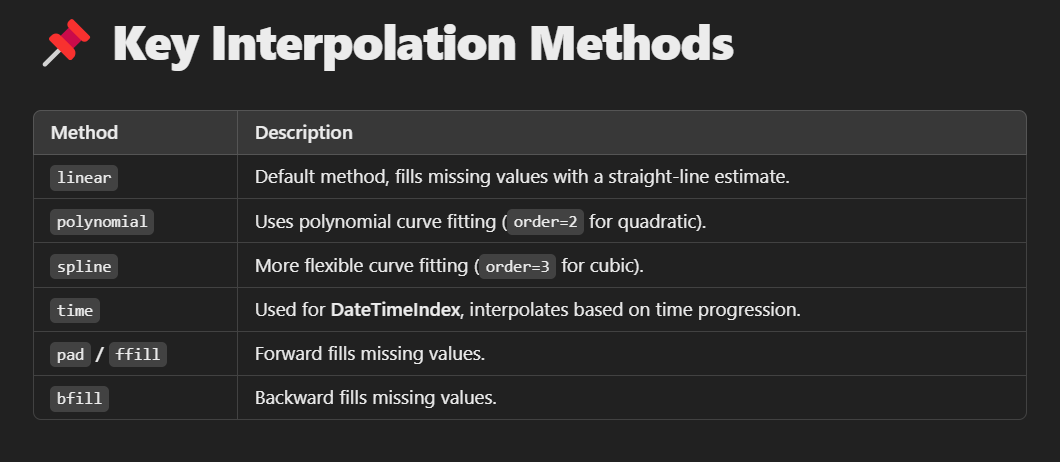

**📌 When to Use interpolate()?**
- ✅ Time-Series Data (e.g., temperature, sales, stock prices).
- ✅ Numerical Data with Missing Values (e.g., sensor readings).
- ✅ Machine Learning Preprocessing (handling missing values).

# rank()

The `rank()` method in Pandas assigns ranks to values in a column based on their magnitude. It is useful when you want to rank data while handling ties.

**Syntax:** `rank(method='average', ascending=True)`

- `method`:	How to assign ranks in case of ties ('average', 'min', 'max', 'first', 'dense').
- `ascending`:	If True, lower values get lower ranks (default). If False, lower values get higher ranks.

In [9]:
# Create DataFrame
df = pd.DataFrame({'Name': ['A', 'B', 'C', 'D', 'E'], 'Score': [88, 92, 88, 95, 91]})

# Apply ranking
df['Rank'] = df['Score'].rank(method='average', ascending=False)
df

,Name,Score,Rank
0,A,88,4.5
1,B,92,2.0
2,C,88,4.5
3,D,95,1.0
4,E,91,3.0


**✅ Explanation:**

- D has the highest score (95) → Rank 1.
- B has 92 → Rank 2.
- E has 91 → Rank 3.
- A and C have 88 → Average rank (4+5)/2 = 4.5.

In [10]:
# Handling Ties with Different Methods

df['Rank_Min'] = df['Score'].rank(method='min', ascending=False)   # Assigns the lowest rank in case of ties
df['Rank_Max'] = df['Score'].rank(method='max', ascending=False)   # Assigns the highest rank in case of ties
df['Rank_First'] = df['Score'].rank(method='first', ascending=False)  # Ranks based on first occurrence
df['Rank_Dense'] = df['Score'].rank(method='dense', ascending=False)  # No gaps in ranks

df

,Name,Score,Rank,Rank_Min,Rank_Max,Rank_First,Rank_Dense
0,A,88,4.5,4.0,5.0,4.0,4.0
1,B,92,2.0,2.0,2.0,2.0,2.0
2,C,88,4.5,4.0,5.0,5.0,4.0
3,D,95,1.0,1.0,1.0,1.0,1.0
4,E,91,3.0,3.0,3.0,3.0,3.0


**✅ Explanation of Methods:**

- average → (4+5)/2 = 4.5.
- min → Assigns lowest rank in ties (4.0 for both A & C).
- max → Assigns highest rank in ties (5.0 for both A & C).
- first → Ranks based on first occurrence (A = 4, C = 5).
- dense → No gaps in ranks (A & C = 4, next = 5 skipped).


In [12]:
import pandas as pd

# Create a DataFrame with employee performance scores
data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Performance Score': [85, 90, 78, 85, 92, 90, 78]
}

df = pd.DataFrame(data)

# Apply different ranking methods
df['Rank_Average'] = df['Performance Score'].rank(method='average', ascending=False)
df['Rank_Min'] = df['Performance Score'].rank(method='min', ascending=False)
df['Rank_Max'] = df['Performance Score'].rank(method='max', ascending=False)
df['Rank_First'] = df['Performance Score'].rank(method='first', ascending=False)
df['Rank_Dense'] = df['Performance Score'].rank(method='dense', ascending=False)

# Display the result
df


,Employee,Performance Score,Rank_Average,Rank_Min,Rank_Max,Rank_First,Rank_Dense
0,Alice,85,4.5,4.0,5.0,4.0,3.0
1,Bob,90,2.5,2.0,3.0,2.0,2.0
2,Charlie,78,6.5,6.0,7.0,6.0,4.0
3,David,85,4.5,4.0,5.0,5.0,3.0
4,Eve,92,1.0,1.0,1.0,1.0,1.0
5,Frank,90,2.5,2.0,3.0,3.0,2.0
6,Grace,78,6.5,6.0,7.0,7.0,4.0


1. Eve has the highest score (92) → Rank 1.
2. Bob & Frank have the same score (90):
    - Rank_Average → (2+3)/2 = 2.5.
    - Rank_Min → Both get 2.
    - Rank_Max → Both get 3.
    - Rank_First → Bob (2), Frank (3).
    - Rank_Dense → Both get 2 (no gaps).
3. Charlie & Grace have the lowest score (78):
    - Rank_Average → (6+7)/2 = 6.5.
    - Rank_Min → Both get 6.
    - Rank_Max → Both get 7.
    - Rank_First → Charlie (6), Grace (7).
    - Rank_Dense → Both get 6 (no gaps).

# idxmax() & idxmin() 
Both methods return the index label of the maximum or minimum value in a Series or DataFrame column.

In [4]:
data = pd.Series({'A': 10, 'B': 25, 'C': 15, 'D': 8})

print("Series:\n", data)

print("\nIndex of max value:", data.idxmax())  # 'B' (25 is the highest)
print("Index of min value:", data.idxmin())  # 'D' (8 is the lowest)

Series:
 A    10
B    25
C    15
D     8
dtype: int64

Index of max value: B
Index of min value: D


In [5]:
df = pd.DataFrame({
    'Math': [85, 90, 78],
    'Science': [88, 92, 80],
    'English': [75, 85, 95]
}, index=['Alice', 'Bob', 'Charlie'])

print("DataFrame:\n", df)

# Maximum and minimum index for each column
print("\nMax index per column:\n", df.idxmax(axis=0))
print("\nMin index per column:\n", df.idxmin(axis=0))

# Maximum and minimum index for each row
print("\nMax index per row:\n", df.idxmax(axis=1))
print("\nMin index per row:\n", df.idxmin(axis=1))


DataFrame:
          Math  Science  English
Alice      85       88       75
Bob        90       92       85
Charlie    78       80       95

Max index per column:
 Math           Bob
Science        Bob
English    Charlie
dtype: object

Min index per column:
 Math       Charlie
Science    Charlie
English      Alice
dtype: object

Max index per row:
 Alice      Science
Bob        Science
Charlie    English
dtype: object

Min index per row:
 Alice      English
Bob        English
Charlie       Math
dtype: object


# mean(), median(), mode()

- The mean() function calculates the arithmetic mean (average) of the values in a DataFrame or Series.
- The median() function calculates the median (middle value) of the values in a DataFrame or Series.
- The mode() function calculates the mode (most frequent value) of the values in a DataFrame or Series. Note that a DataFrame may have multiple modes if there are ties.

Syntax:
- `DataFrame.mode() or Series.mode()`
- `DataFrame.median() or Series.median()`
- `DataFrame.mean() or Series.mean()`

In [96]:
data = {'Column1': [1, 2, 2, 3, 4, 5],
        'Column2': [5, 4, 4, 3, 2, 1]}

df = pd.DataFrame(data)

# Calculate the mean of each column
mean_values = df.mean()
print(mean_values)

# Calculate the median of each column
median_values = df.median()
print(median_values)

# Calculate the mode of each column
mode_values = df.mode()
print(mode_values)

Column1    2.833333
Column2    3.166667
dtype: float64
Column1    2.5
Column2    3.5
dtype: float64
   Column1  Column2
0        2        4


# skew() and kurt()

Both skew() and kurt() are used in statistics to measure the shape of a data distribution.

- Skewness describes whether a dataset is symmetrically distributed or leaning towards one side.

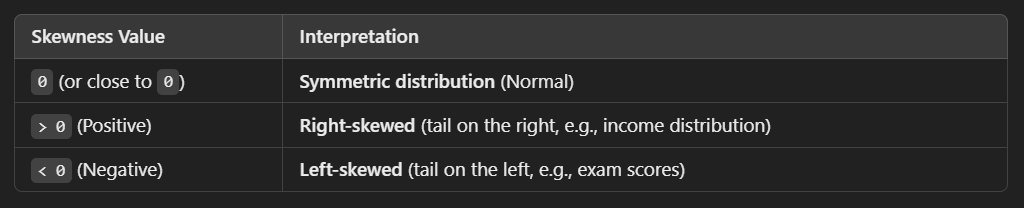

- Kurtosis measures how heavy or light the tails of a distribution are compared to a normal distribution.

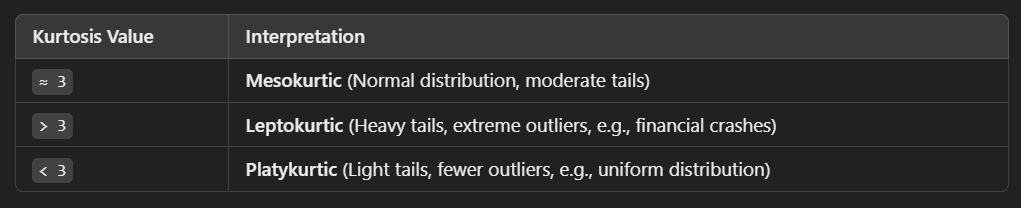

In [6]:
# Creating a sample dataset
data = {'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'B': [5, 15, 25, 35, 45, 55, 65, 75, 85, 100]}

df = pd.DataFrame(data)

# Calculate skewness
print("Skewness of A:", df['A'].skew())
print("Skewness of B:", df['B'].skew())

# Calculate kurtosis
print("Kurtosis of A:", df['A'].kurt())
print("Kurtosis of B:", df['B'].kurt())

Skewness of A: 0.0
Skewness of B: 0.09570272191573442
Kurtosis of A: -1.2000000000000002
Kurtosis of B: -1.0441685414940016


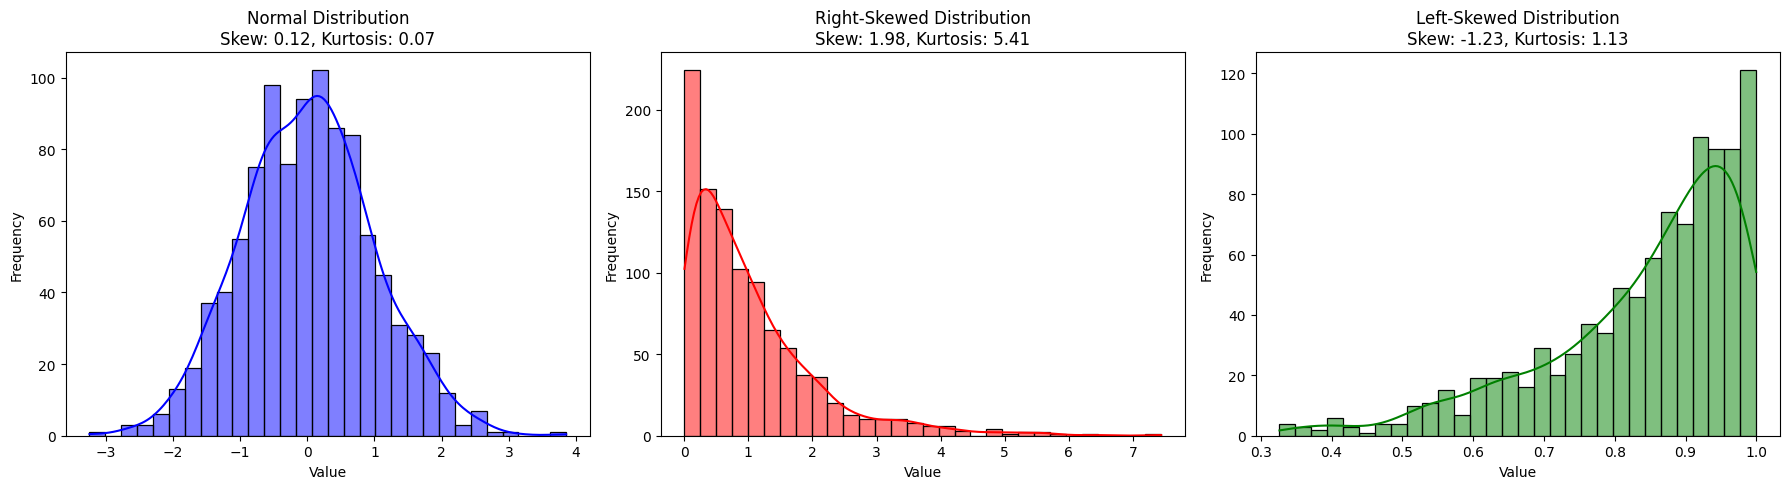

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Generating Different Distributions
np.random.seed(42)

# Normal Distribution (Skew ≈ 0, Kurtosis ≈ 3)
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Right-Skewed Distribution (Skew > 0)
right_skewed = np.random.exponential(scale=1, size=1000)

# Left-Skewed Distribution (Skew < 0)
left_skewed = np.random.beta(a=5, b=1, size=1000)  # Beta distribution is left-skewed

# Creating a DataFrame
df = pd.DataFrame({'Normal': normal_data, 'Right-Skewed': right_skewed, 'Left-Skewed': left_skewed})

# Plotting Histograms with KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color=['blue', 'red', 'green'][i])
    axes[i].set_title(f'{col} Distribution\nSkew: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


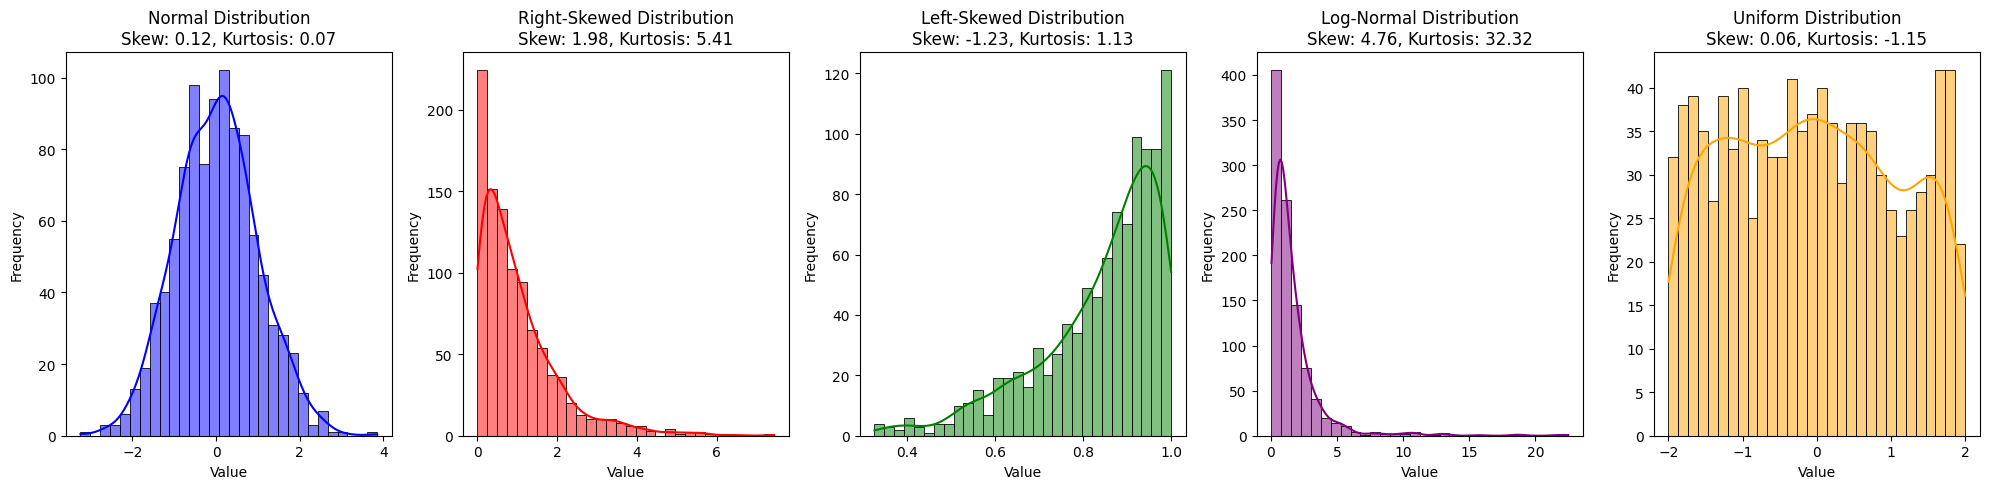

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate Different Distributions
normal_data = np.random.normal(loc=0, scale=1, size=1000)   # Normal
right_skewed = np.random.exponential(scale=1, size=1000)    # Right-Skewed
left_skewed = np.random.beta(a=5, b=1, size=1000)           # Left-Skewed
log_normal = np.random.lognormal(mean=0, sigma=1, size=1000) # Log-Normal
uniform_data = np.random.uniform(low=-2, high=2, size=1000) # Uniform Distribution

# Creating a DataFrame
df = pd.DataFrame({
    'Normal': normal_data,
    'Right-Skewed': right_skewed,
    'Left-Skewed': left_skewed,
    'Log-Normal': log_normal,
    'Uniform': uniform_data
})

# Plot Histograms with KDE
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color=['blue', 'red', 'green', 'purple', 'orange'][i])
    axes[i].set_title(f'{col} Distribution\nSkew: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# corr()

The `corr()` function in pandas is used to calculate the correlation coefficient between columns in a DataFrame. Correlation measures the statistical association between two variables, indicating the strength and direction of their linear relationship.

In [99]:
df=pd.read_csv('data.csv')
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


#### Result Explained

The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.

**The number varies from -1 to 1**.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

**What is a good correlation?** It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.

#### Perfect Correlation:
We can see that "Duration" and "Duration" got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.

#### Good Correlation:
"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

#### Bad Correlation:
"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

**Note:** The `corr()` method ignores "not numeric" columns.

- `corr(a,b)=corr(b,a)`
    - ✅ When a increases, b almost always increases.
    - ✅ When b increases, a almost always increases.

# cov()

The .`cov()` method in Pandas computes the covariance between numerical columns of a DataFrame.

- Covariance measures how two variables change together.
- A positive covariance means they increase together.
- A negative covariance means one increases while the other decreases.
- A zero or near-zero covariance means no relationship.
- The diagonal elements represent the variance of each column

**Syntax:** `df.cov(min_periods=None)`
- `min_periods`: The minimum number of observations required to calculate the covariance. If fewer values are available, the result is NaN.

In [14]:
# Sample DataFrame
data = {
    'Math': [85, 90, 78, 92, 88],
    'Science': [82, 89, 84, 90, 86],
    'English': [78, 85, 80, 88, 83]
}

df = pd.DataFrame(data)

# Compute covariance
cov_matrix = df.cov()
cov_matrix

,Math,Science,English
Math,29.80,13.85,16.90
Science,13.85,11.20,13.05
English,16.90,13.05,15.70


**How to Interpret Covariance?**
- Diagonal values (e.g., Math-Math) represent variance (spread of each column).
- Off-diagonal values represent covariance:
    - 25.75 (Math & Science) → Positive covariance (scores increase together).
    - 10.50 (Science & English) → Positive but weaker relationship.

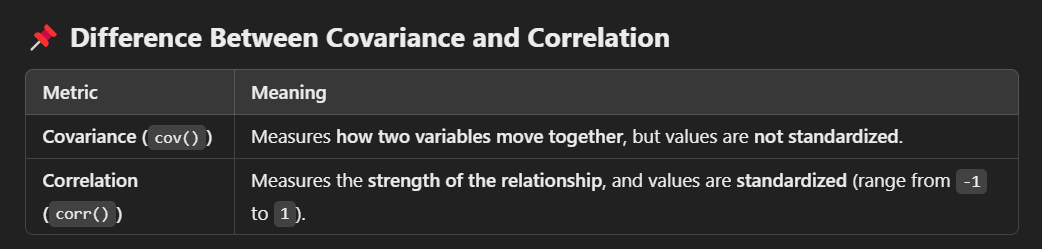

# plot()

Pandas uses the `plot()` method to create diagrams.

We can use Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.

**Syntax:** DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, `**`kwds)  

x: Refers to label or position, default value None

y: Refers to label, position or list of label, positions, default value None

It allows the plotting of one column versus another.

kind: str

    'line': line plot (default)
    'bar': vertical bar plot
    'barh': horizontal bar plot
    'hist': histogram
    'box': boxplot
    'kde': Kernel Density Estimation plot
    'density': same as 'kde'
    'area': area plot
    'pie': pie plot
    'scatter': scatter plot
    'hexbin': hexbin plot

**Every plot kind has a corresponding method on the `DataFrame.plot accessor`:** 

`df.plot(kind='line')` that are generally equivalent to the `df.plot.line()`.

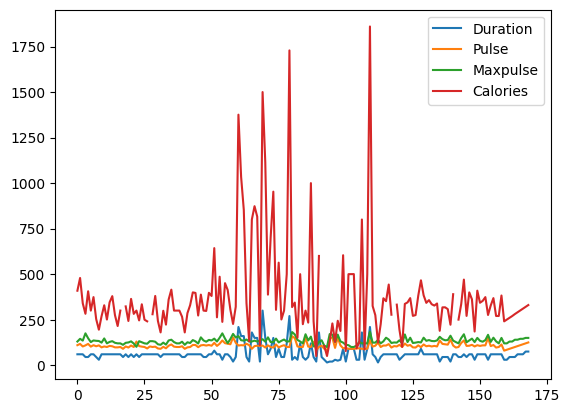

In [102]:
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

df.plot(kind='line')

plt.show()

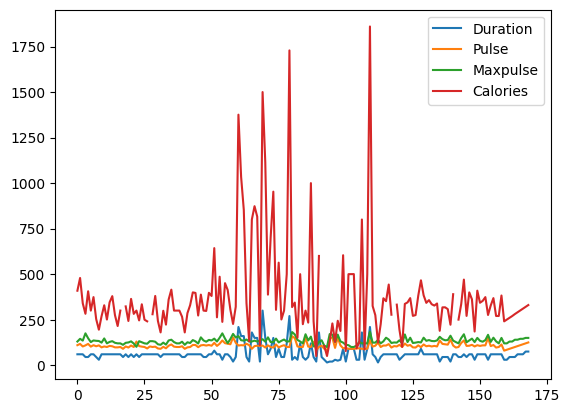

In [103]:
df.plot.line()

plt.show()

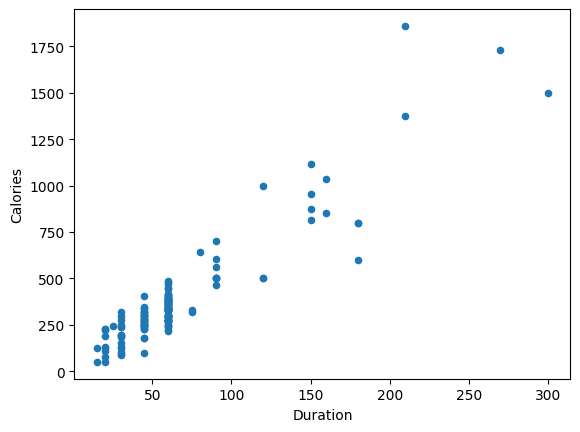

In [104]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')

plt.show()

<Axes: xlabel='Duration', ylabel='Calories'>

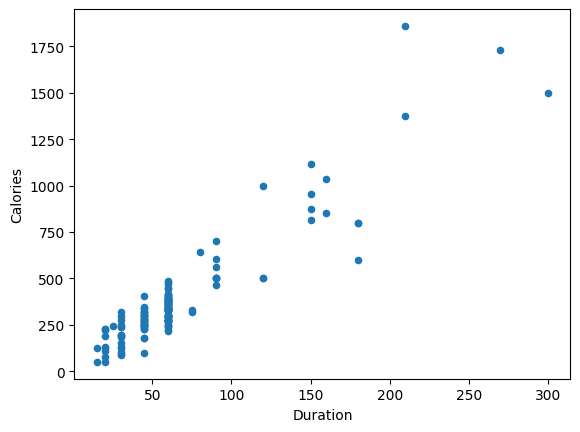

In [105]:
df.plot.scatter(x = 'Duration', y = 'Calories')

<Axes: ylabel='Frequency'>

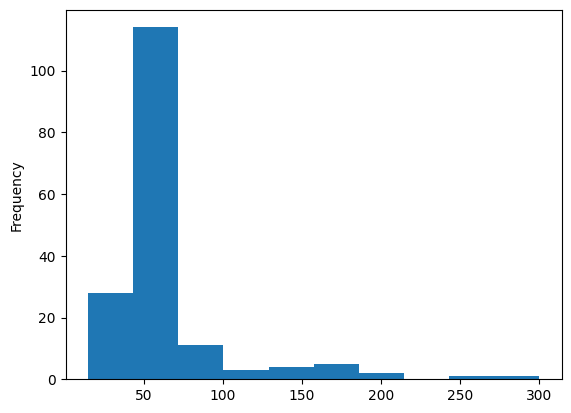

In [106]:
df["Duration"].plot(kind = 'hist')#A histogram needs only one column.

#A histogram shows us the frequency of each interval

<Axes: ylabel='Frequency'>

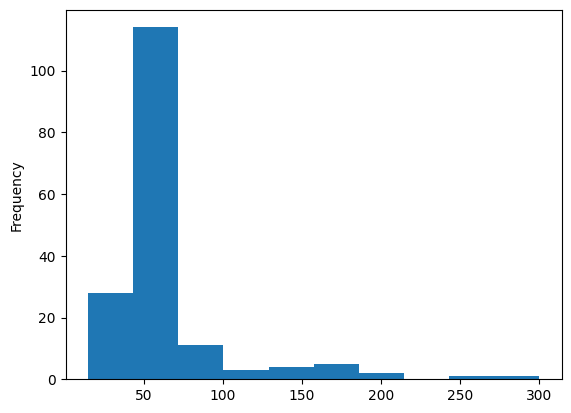

In [107]:
df["Duration"].plot.hist()

# append()

The Pandas `append()` function is used to add the rows of other dataframe to the end of the given dataframe, returning a new dataframe object. The new columns and the new cells are inserted into the original DataFrame that are populated with NaN value.

**The `append` method has been deprecated and is removed in recent versions of pandas.**

In [ ]:
# Create first Dataframe using dictionary  
info1 = pd.DataFrame({"x":[25,15,12,19],   
                    "y":[47, 24, 17, 29]})     
# Create second Dataframe using dictionary   
info2 = pd.DataFrame({"x":[25, 15, 12],   
                    "y":[47, 24, 17],    
                    "z":[38, 12, 45]})   

# append info2 at end in info1  
info1.append(info2, ignore_index = True) #  resets the index of the resulting DataFrame.  

In [102]:
info1.append(info2, ignore_index = False)

,x,y
0,15,24
1,25,38
2,37,18
3,42,45
0,15,24
1,25,38
2,37,45


# apply()

The Pandas `apply()` function allows the user to pass a function and apply it to every single value of the Pandas series. 

- It helps to segregate data according to the conditions required. So that it can be efficiently used for data science and machine learning.
- It can be used to transform data, calculate new columns, or perform any custom operation on each element of a DataFrame or Series.

In [110]:
# Create a sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [111]:
# Apply a function to each column
result_columns = df.apply(lambda x: x * 2)
result_columns

,A,B,C
0,2,8,14
1,4,10,16
2,6,12,18


In [112]:
# Apply a function to each row
result_rows = df.apply(lambda x: sum(x), axis=1)
result_rows

0    12
1    15
2    18
dtype: int64

In [113]:
# Apply a function to each column
result_rows = df.apply(lambda x: sum(x), axis=0)
result_rows

A     6
B    15
C    24
dtype: int64

# map()

There is no `map(`) method for a DataFrame (`df.map()` does not exist in Pandas).

However, map() exists for Pandas Series and is used to apply a function or mapping dictionary to each element of a single column (Series).

**The map() method is used on a Series to:**

- Apply a function element-wise.
- Replace values using a dictionary.
- Replace values using another Series.

In [4]:
# Create a Series
s = pd.Series([1, 2, 3, 4, 5])

# Square each element
s_squared = s.map(lambda x: x**2)
s_squared

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [5]:
s = pd.Series(['A', 'B', 'C', 'D'])

# Define mapping
mapping_dict = {'A': 'Apple', 'B': 'Banana', 'C': 'Cherry', 'D': 'Date'}

# Replace values
s_mapped = s.map(mapping_dict)
s_mapped

0     Apple
1    Banana
2    Cherry
3      Date
dtype: object

In [6]:
s = pd.Series(['cat', 'dog', 'fish'])

# Define another Series
mapping_series = pd.Series({'cat': 'meow', 'dog': 'bark', 'fish': 'blub'})

# Replace values using another Series
s_mapped = s.map(mapping_series)
s_mapped

0    meow
1    bark
2    blub
dtype: object

# applymap()

The `applymap()` method is used to apply a function element-wise to every value in a DataFrame (i.e., it works on individual elements, not rows or columns).

It is similar to:

- apply() → Used for rows (axis=1) or columns (axis=0).
- map() → Used for element-wise operations on a Series.

**Syntax:** `df.applymap(func)`

In [7]:
# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Apply a function to square each element
df_squared = df.applymap(lambda x: x**2)
df_squared

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_7748\1175183398.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_squared = df.applymap(lambda x: x**2)


,A,B,C
0,1,16,49
1,4,25,64
2,9,36,81


In [8]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'City': ['New York', 'Los Angeles', 'Chicago']
})

# Convert all string values to uppercase
df_upper = df.applymap(lambda x: x.upper())
df_upper

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_7748\953215311.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_upper = df.applymap(lambda x: x.upper())


,Name,City
0,ALICE,NEW YORK
1,BOB,LOS ANGELES
2,CHARLIE,CHICAGO


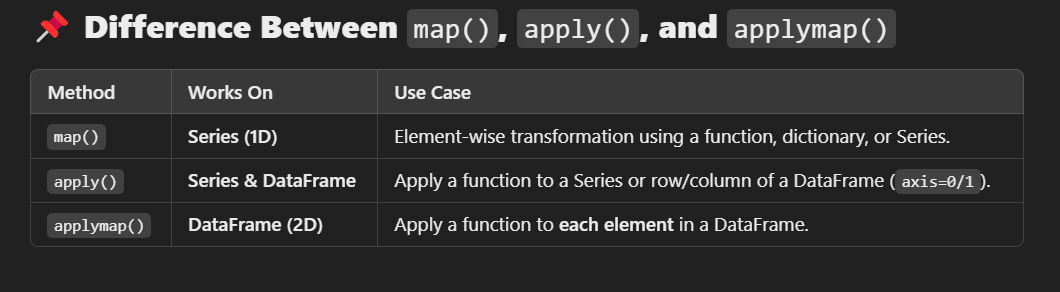

In [9]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': ['apple', 'banana', 'cherry', 'date']
})

df

,A,B,C
0,1,5,apple
1,2,6,banana
2,3,7,cherry
3,4,8,date


In [10]:
# Apply a function to a single column (Series)
df['A'] = df['A'].map(lambda x: x * 10)
df

,A,B,C
0,10,5,apple
1,20,6,banana
2,30,7,cherry
3,40,8,date


In [11]:
# Apply function to a single column (Series)
df['B'] = df['B'].apply(lambda x: x ** 2)
df

,A,B,C
0,10,25,apple
1,20,36,banana
2,30,49,cherry
3,40,64,date


In [12]:
# Find the sum of each row
df['Row_Sum'] = df[['A', 'B']].apply(lambda row: row.sum(), axis=1)
df

,A,B,C,Row_Sum
0,10,25,apple,35
1,20,36,banana,56
2,30,49,cherry,79
3,40,64,date,104


In [13]:
# Square each numerical value in the DataFrame
df[['A', 'B']] = df[['A', 'B']].applymap(lambda x: x ** 2)
df

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_7748\870566745.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['A', 'B']] = df[['A', 'B']].applymap(lambda x: x ** 2)


,A,B,C,Row_Sum
0,100,625,apple,35
1,400,1296,banana,56
2,900,2401,cherry,79
3,1600,4096,date,104


# agg()

The `agg()` function in pandas, it's commonly used to perform multiple aggregation operations on a DataFrame or Series.

In [114]:
# Create a sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)
print(df)
# Use agg() to apply multiple aggregation functions
result_aggregate = df.agg(['sum', 'mean', 'max'])
result_aggregate

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


,A,B,C
sum,6.0,15.0,24.0
mean,2.0,5.0,8.0
max,3.0,6.0,9.0


In [115]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})  

,A,B
sum,6.0,NaN
min,1.0,4.0
max,NaN,6.0


# cumsum() and cumprod()

The `cumsum()` method computes the cumulative sum of values along a given axis.

**Syntax:** `df.cumsum(axis=None, skipna=True)`
- `axis=0` (default): Computes the cumulative sum column-wise.
- `axis=1`: Computes the cumulative sum row-wise.
- `skipna=True`: Ignores NaN values.

The .cumprod() method computes the cumulative product (multiplication of all previous values).

**Syntax:** `df.cumprod(axis=None, skipna=True)`
- `axis=0` (default): Computes cumulative product column-wise.
- `axis=1`: Computes cumulative product row-wise.
- `skipna=True`: Ignores NaN values.

In [19]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

# Compute cumulative sum
df_cumsum = df.cumsum() #  Each value is the sum of all previous values in that column.
df_cumsum

,A,B
0,1,10
1,3,30
2,6,60
3,10,100
4,15,150


In [ ]:
# Compute cumulative product
df_cumprod = df.cumprod() # Each value is the product of all previous values in that column.
df_cumprod

# groupby()

The `groupby()` function in pandas is used to split a DataFrame into groups based on some criteria, apply a function to each group independently, and then combine the results into a new DataFrame. 
- It is a powerful and flexible tool for performing group-wise operations on data.

In [2]:
# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Group by the 'Category' column
grouped = df.groupby('Category')
grouped

In [3]:
for group,data in grouped:
    print("Category: ", group)
    print(data)

Category:  A
  Category  Value
0        A      1
2        A      3
4        A      5
Category:  B
  Category  Value
1        B      2
3        B      4


In [118]:
# Calculate the mean for each group
result = grouped.mean()
result

,Value
Category,
A,3.0
B,3.0


### Grouping by Multiple Columns:

In [16]:

# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Subcategory': ['X', 'Y', 'X', 'Y', 'Z'],
        'Value': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Group by multiple columns
grouped = df.groupby(['Category', 'Subcategory'])
print(type(grouped))

df

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Category,Subcategory,Value
0,A,X,1
1,B,Y,2
2,A,X,3
3,B,Y,4
4,A,Z,5


In [18]:
grouped.groups

{('A', 'X'): [0, 2], ('A', 'Z'): [4], ('B', 'Y'): [1, 3]}

In [17]:
grouped.groups.items()

dict_items([(('A', 'X'), Index([0, 2], dtype='int64')), (('A', 'Z'), Index([4], dtype='int64')), (('B', 'Y'), Index([1, 3], dtype='int64'))])

In [120]:
# Print the grouped data
for group_name, group_indices in grouped.groups.items():
    print(f"Group: {group_name}")
    print(df.loc[group_indices])
    print("\n")

Group: ('A', 'X')
  Category Subcategory  Value
0        A           X      1
2        A           X      3


Group: ('A', 'Z')
  Category Subcategory  Value
4        A           Z      5


Group: ('B', 'Y')
  Category Subcategory  Value
1        B           Y      2
3        B           Y      4




In [121]:
# Calculate the sum for each group
result = grouped.sum()
result

Value
Category Subcategory       
A        X                4
         Z                5
B        Y                6

In [122]:
# another example

data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'A'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [10, 20, 10, 20, 10, 20, 30, 40]
}
df = pd.DataFrame(data)
df

,Category,Subcategory,Value
0,A,X,10
1,A,Y,20
2,B,X,10
3,B,Y,20
4,C,X,10
5,C,Y,20
6,A,X,30
7,A,Y,40


In [123]:
grouped = df.groupby(['Category', 'Subcategory'])

# Print the grouped data
for group_name, group_indices in grouped.groups.items():
    print(f"Group: {group_name}")
    print(df.loc[group_indices])
    print("\n")


Group: ('A', 'X')
  Category Subcategory  Value
0        A           X     10
6        A           X     30


Group: ('A', 'Y')
  Category Subcategory  Value
1        A           Y     20
7        A           Y     40


Group: ('B', 'X')
  Category Subcategory  Value
2        B           X     10


Group: ('B', 'Y')
  Category Subcategory  Value
3        B           Y     20


Group: ('C', 'X')
  Category Subcategory  Value
4        C           X     10


Group: ('C', 'Y')
  Category Subcategory  Value
5        C           Y     20




### Applying Custom Aggregation Functions:

In [124]:
# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Group by the 'Category' column and apply a custom aggregation function
def custom_agg_function(group):
    return {'Sum': group.sum(), 'Mean': group.mean()}

result = df.groupby('Category').apply(custom_agg_function)
result

Category
A    {'Sum': [9], 'Mean': [3.0]}
B    {'Sum': [6], 'Mean': [3.0]}
dtype: object

In [2]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
        'Age': [25, 30, 22, 27, 24],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'London'],
        'Salary': [50000, 60000, 45000, 55000, 52000]}

df = pd.DataFrame(data)
grouped_data = df.groupby('City')

# Calculate the mean and sum of salaries for each city
aggregated_data = grouped_data.agg({'Salary': ['mean', 'sum']})
aggregated_data

Salary        
             mean     sum
City                     
London    56000.0  112000
New York  50000.0   50000
Paris     45000.0   45000
Tokyo     55000.0   55000

In [4]:
df_sal = df.groupby(['Name', 'City'])['Salary'] # selects the 'Salary' column from the grouped data.
df_sal

In [126]:
mean_salary = df.groupby(['Name', 'City'])['Salary'].mean()
mean_salary

Name     City    
Alice    New York    50000.0
Bob      London      60000.0
Charlie  Paris       45000.0
David    Tokyo       55000.0
Emma     London      52000.0
Name: Salary, dtype: float64

In [127]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
        'Age': [25, 30, 22, 27, 24],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'London'],
        'Salary': [50000, 60000, 45000, 55000, 52000]}

df = pd.DataFrame(data)
grouped_data = df.groupby('City')

# Custom function to calculate the average age for each city
def calculate_avg_age(group):
    return group['Age'].mean()

result = grouped_data.apply(calculate_avg_age)
result

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_8316\3461988382.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped_data.apply(calculate_avg_age)


City
London      27.0
New York    25.0
Paris       22.0
Tokyo       27.0
dtype: float64

The warning you are encountering is informing you that the behavior of `DataFrameGroupBy.apply` is changing. In future versions of pandas, the grouping columns will be excluded from the operation unless explicitly specified. To address this warning, you have a couple of options:

- Explicitly select the relevant columns after the `groupby` operation.


In [129]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
        'Age': [25, 30, 22, 27, 24],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'London'],
        'Salary': [50000, 60000, 45000, 55000, 52000]}

df = pd.DataFrame(data)
grouped_data = df.groupby('City')['Age']

# Custom function to calculate the average age for each city
def calculate_avg_age(group):
    return group.mean()

result = grouped_data.apply(calculate_avg_age)
print(result)


City
London      27.0
New York    25.0
Paris       22.0
Tokyo       27.0
Name: Age, dtype: float64


# merge()

The `merge()` function in pandas is used to merge two or more DataFrames based on a common column or index. 
- This operation is similar to SQL joins and is a fundamental tool for combining and integrating data from different sources.

**Syntax:** `pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)`

- `left` and `right`: The two DataFrames you want to merge.
- `how`: Specifies the type of join to be performed. It can be 'inner' (default), 'outer', 'left', or 'right'.
- `on`, `left_on`, and `right_on`: Columns to use as keys for the merge. `on` is used when both DataFrames have the same column name for merging, while `left_on` and `right_on` are used when the column names differ between DataFrames.
- `left_index` and `right_index`: Booleans indicating whether to use the left DataFrame's (right DataFrame's) index as the merge key.
- `suffixes`: If there are overlapping column names in the merged DataFrames, you can specify custom suffixes for the columns to avoid naming conflicts.

In [130]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Age': [25, 30, 22]})

# Merge DataFrames based on the 'ID' column
merged_df = pd.merge(df1, df2, on='ID', how='inner')
merged_df

,ID,Name,Age
0,2,Bob,25
1,3,Charlie,30


- `'inner'`: Use only the common keys.
- `'outer'`: Use all keys from both DataFrames, filling in missing values with NaN.
- `'left'`: Use all keys from the left DataFrame.
- `'right'`: Use all keys from the right DataFrame.

In [132]:
# Create two sample DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'City': ['A', 'D', 'C'], 'Value': [10, 20, 30]})
df2 = pd.DataFrame({'ID': [1, 2, 3], 'City': ['A', 'B', 'C'], 'Score': [95, 85, 92]})

# Merge DataFrames based on multiple columns 'ID' and 'City'
merged_df = pd.merge(df1, df2, on=['ID', 'City'], how='inner')

# In this case, the DataFrames are merged based on the combination of values in both
#the 'ID' and 'City' columns. 
# Only rows where both 'ID' and 'City' values match will be included in the result.

merged_df

,ID,City,Value,Score
0,1,A,10,95
1,3,C,30,92


Additionally, you can specify different column names for merging if the keys have different names in the two DataFrames, using the `left_on` and `right_on` parameters.

In [3]:
# Merge with different column names
df1 = pd.DataFrame({'ID1': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID2': [2, 3, 4], 'Age': [25, 30, 22]})
merged_df_diff_names = pd.merge(df1, df2, left_on='ID1', right_on='ID2', how='inner')
merged_df_diff_names

,ID1,Name,ID2,Age
0,2,Bob,2,25
1,3,Charlie,3,30


You can also use different column names for merging in each DataFrame by using left_on and right_on parameters:

In [136]:
# Merge with different column names in each DataFrame
df1 = pd.DataFrame({'ID1': [1, 2, 3], 'City1': ['A', 'B', 'C'], 'Value': [10, 20, 30]})
df2 = pd.DataFrame({'ID2': [1, 2, 3], 'City2': ['A', 'B', 'C'], 'Score': [95, 85, 92]})

merged_df_diff_names = pd.merge(df1, df2, left_on=['ID1', 'City1'], right_on=['ID2', 'City2'], how='inner')
merged_df_diff_names 

,ID1,City1,Value,ID2,City2,Score
0,1,A,10,1,A,95
1,2,B,20,2,B,85
2,3,C,30,3,C,92


### Non-common data

In [11]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3, 4], 'Value1': ['A', 'B', 'C', 'D']})
df2 = pd.DataFrame({'ID': [3, 4, 5, 6], 'Value2': ['X', 'Y', 'Z', 'W']})

# Outer merge (includes all records from both DataFrames)
merged_df = pd.merge(df1, df2, on='ID', how='outer', indicator=True)

# Select only non-common records (where _merge is not "both")
non_common = merged_df[merged_df['_merge'] != 'both'].drop(columns=['_merge'])

non_common

,ID,Value1,Value2
0,1,A,NaN
1,2,B,NaN
4,5,NaN,Z
5,6,NaN,W


**Explanation**
- Outer Join (`how='outer'`) → Keeps all data from both DataFrames.
- `indicator=True` → Adds a `_merge` column to track the source of each row:
    - `"both"` → Common in both DataFrames
    - `"left_only"` → Only in df1
    - `"right_only"` → Only in df2
- Filter rows where `_merge != 'both'` to get only the non-common data.

# join()

The `join()` method in pandas is used to join two or more DataFrames based on their index(by default) or columns. 
- It is similar to the `merge()` method, but it operates on the index by default. 
- The `join()` method is a convenient way to combine DataFrames when the join key is the index.
- It is a more concise way to perform a merge when you want to combine DataFrames using their indices as keys.
- By default, the `join()` method performs a left join, which is similar to the SQL LEFT JOIN. 

**Syntax:** `left_dataframe.join(right_dataframe, how='left', lsuffix='', rsuffix='')`

- `right_dataframe`: The DataFrame you want to join with the left DataFrame.
- `how`: Specifies the type of join to be performed, which can be 'left', 'right', 'outer', or 'inner'.
- `lsuffix` and `rsuffix`: If the DataFrames have overlapping column names, you can specify custom suffixes to differentiate them in the resulting DataFrame.

In [137]:
# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['X', 'Y', 'Z'])
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]}, index=['X', 'Y', 'Z'])

# Join DataFrames based on their index
joined_df = df1.join(df2)
joined_df

,A,B,C,D
X,1,4,7,10
Y,2,5,8,11
Z,3,6,9,12


In [133]:
# Create two DataFrames
df3 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

df4 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K4'],
    'C': ['C0', 'C1', 'C2', 'C4'],
    'D': ['D0', 'D1', 'D2', 'D4']
})

# Set 'key' column as index for joining
df3.set_index('key', inplace=True)
df4.set_index('key', inplace=True)

# Join df3 and df4 on the 'key' column
result_column_join = df3.join(df4, how='inner')
print(result_column_join)


      A   B   C   D
key                
K0   A0  B0  C0  D0
K1   A1  B1  C1  D1
K2   A2  B2  C2  D2


In [2]:
# Joining on a Column Instead of Index

df1 = pd.DataFrame({'Key': ['a', 'b', 'c'], 'A': [1, 2, 3]})
df2 = pd.DataFrame({'B': [4, 5, 6]}, index=['a', 'b', 'd'])

df_joined = df1.join(df2, on='Key', how='left') # 'Key' in df1 is used to match indices in df2
df_joined


,Key,A,B
0,a,1,4.0
1,b,2,5.0
2,c,3,NaN


In [4]:
# Joining on a Column Instead of Index

df1 = pd.DataFrame({'Key': ['a', 'b', 'c'], 'A': [1, 2, 3]})
df2 = pd.DataFrame({'B': [4, 5, 6]}, index=df1['Key'])

df_joined = df1.join(df2, on='Key', how='left') # 'Key' in df1 is used to match indices in df2
df_joined


,Key,A,B
0,a,1,4
1,b,2,5
2,c,3,6


# concat()

The `concat()` function in pandas is used to concatenate two or more pandas objects (usually DataFrames) along a particular axis. It can concatenate along rows (axis=0) or columns (axis=1).

- The `concat()` function is useful for combining datasets when you want to stack them vertically or horizontally, and it's especially handy when the datasets have the same column names or index.

In [134]:
# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenate DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df2], axis=0, ignore_index=True)
concatenated_df

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


In [139]:
# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'C': [5, 6], 'D': [7, 8]})

# Concatenate DataFrames along columns (axis=1)
concatenated_df = pd.concat([df1, df2], axis=1)
concatenated_df

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


# set_index()

The `set_index()` method in pandas is used to set a specified column or a combination of columns as the index of a DataFrame. This method returns a new DataFrame with the specified column(s) as the index.

In [142]:
# Create a sample DataFrame
data = {'ID': [1, 2, 3],
        'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Set the 'ID' column as the index
df_new_index = df.set_index('ID')
df_new_index

,Name,Age
ID,,
1,Alice,25
2,Bob,30
3,Charlie,22


You can also set multiple columns as the index by passing a list of column names to `set_index()`:

In [143]:
# Set multiple columns as the index
df_multi_index = df.set_index(['ID', 'Name'])
df_multi_index

,,Age
ID,Name,
1,Alice,25
2,Bob,30
3,Charlie,22


# melt()

The `melt()` function in pandas is used to transform or reshape a DataFrame from wide format to long format. 
- It unpivots the DataFrame, making it more suitable for analysis or visualization. 
- The `melt()` function essentially "melts" or "stacks" a DataFrame by transforming its columns into rows.
-  It essentially converts columns into rows, allowing you to gather or stack multiple columns into two columns: one for variable names and another for their corresponding values. The syntax for melt() is:

`melted_df = pd.melt(df, id_vars=id_vars_columns, value_vars=value_vars_columns, var_name='variable_name', value_name='value')`

- `df` is the original DataFrame 
- `id_vars` are the columns that should be kept as identifier variables OR Columns to be retained in the melted DataFrame. 
- `value_vars` are the columns that will be "unpivoted" or melt. If not specified, all columns except those in `id_vars` will be melted. 
- `var_name` parameter specifies the name of the new variable column OR Name to be used for the new variable (column containing the original column names).
- `value_name` specifies the name of the new value column OR name to be used for the values column (column containing the original values).

In [135]:
# Create a sample DataFrame
data = {'ID': [1, 2, 3],
        'Name': ['Alice', 'Bob', 'Charlie'],
        'Math': [90, 85, 78],
        'Physics': [88, 92, 80],
        'Chemistry': [76, 89, 93]}

df = pd.DataFrame(data)
print(df)

# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['ID', 'Name'], var_name='Subject', value_name='Score')
melted_df

   ID     Name  Math  Physics  Chemistry
0   1    Alice    90       88         76
1   2      Bob    85       92         89
2   3  Charlie    78       80         93


,ID,Name,Subject,Score
0,1,Alice,Math,90
1,2,Bob,Math,85
2,3,Charlie,Math,78
3,1,Alice,Physics,88
4,2,Bob,Physics,92
5,3,Charlie,Physics,80
6,1,Alice,Chemistry,76
7,2,Bob,Chemistry,89
8,3,Charlie,Chemistry,93


In this example, the `melt()` function is applied to the original DataFrame, and the columns 'Math', 'Physics', and 'Chemistry' are melted into two new columns, 'Subject' and 'Score'. The id_vars parameter specifies the columns that should remain unchanged in the melted DataFrame.

In [136]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Math': [90, 85, 78],
        'English': [80, 88, 92],
        'Science': [95, 84, 88]}

df = pd.DataFrame(data)

# Melt the DataFrame from wide to long format
melted_df = pd.melt(df, id_vars='Name', value_vars=['Math', 'English', 'Science'], var_name='Subject', value_name='Score')
melted_df

,Name,Subject,Score
0,Alice,Math,90
1,Bob,Math,85
2,Charlie,Math,78
3,Alice,English,80
4,Bob,English,88
5,Charlie,English,92
6,Alice,Science,95
7,Bob,Science,84
8,Charlie,Science,88


# explode()

The `explode()` method is used to transform list-like or array-like values in a column into separate rows.

**Syntax:**: `df.explode(column, ignore_index=False)`

- `column` (str or list) → The column(s) containing list-like data to be exploded.
- `ignore_index` (bool, default = False) → If True, resets the index after exploding.

In [12]:
# Sample DataFrame with a list column
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Hobbies': [['Reading', 'Swimming'], ['Cycling'], ['Singing', 'Dancing']]
})

df

,Name,Hobbies
0,Alice,"[Reading, Swimming]"
1,Bob,[Cycling]
2,Charlie,"[Singing, Dancing]"


In [13]:
# Apply explode() on 'Hobbies' column
df_exploded = df.explode('Hobbies')
df_exploded

,Name,Hobbies
0,Alice,Reading
0,Alice,Swimming
1,Bob,Cycling
2,Charlie,Singing
2,Charlie,Dancing


In [ ]:
# Resetting Index

df_exploded = df.explode('Hobbies', ignore_index=True)
df_exploded

In [30]:
# Exploding Multiple Columns

df['Scores'] = [[80, 85], [90], [75, 88]]
df_exploded = df.explode(['Hobbies', 'Scores'])
df_exploded

,Name,Hobbies,Scores
0,Alice,Reading,80
0,Alice,Swimming,85
1,Bob,Cycling,90
2,Charlie,Singing,75
2,Charlie,Dancing,88


# pivot()

The `pivot()` function in pandas is used to reshape a DataFrame from long format to wide format, essentially pivoting the data based on specified columns. 
- It allows you to reorganize the data to have a different shape, making it more convenient for certain analyses and visualizations.

`pivoted_df = df.pivot(index='index_column', columns='columns_to_pivot', values='values_column')`

- `df` is the original DataFrame 
- `index` is the column that will become the new index of the pivoted DataFrame OR column whose unique values become the index of the pivoted DataFrame.
- `columns` is the column that will be used to create new columns OR column whose unique values become the columns of the pivoted DataFrame.
- `values` is the column from which values will be filled into the new DataFrame OR column whose values are used to fill in the cells of the pivoted DataFrame.

In [196]:
# Create a sample DataFrame
data = {'ID': [1, 1, 2, 2, 3, 3],
        'Subject': ['Math', 'Physics', 'Math', 'Physics', 'Math', 'Physics'],
        'Score': [90, 88, 85, 92, 78, 80]}

df = pd.DataFrame(data)
print(df)
# Pivot the DataFrame
pivoted_df = df.pivot(index='ID', columns='Subject', values='Score')
pivoted_df

   ID  Subject  Score
0   1     Math     90
1   1  Physics     88
2   2     Math     85
3   2  Physics     92
4   3     Math     78
5   3  Physics     80


Subject,Math,Physics
ID,,
1,90,88
2,85,92
3,78,80


In this example, the `pivot()` function is applied to the original DataFrame, and it reshapes the data based on the 'ID' and 'Subject' columns. The 'Score' values are placed in the corresponding cells, resulting in a DataFrame with 'ID' as the index, 'Math' and 'Physics' as columns, and the respective scores in the cells.

It's important to note that pivot() works when the combination of 'ID', 'Subject' pairs is unique in the original DataFrame. 
**If you have duplicates and need to aggregate values, you may want to use `pivot_table()` instead.**

In [138]:
# Pivot using pivot_table() with aggregation (e.g., taking the mean of scores for duplicate entries)
pivoted_table = df.pivot_table(index='ID', columns='Subject', values='Score', aggfunc='mean')
pivoted_table

Subject,Math,Physics
ID,,
1,90.0,88.0
2,85.0,92.0
3,78.0,80.0


# pivot_table()

The `pivot_table()` function in pandas is similar to `pivot()`, but it provides additional flexibility by allowing you to aggregate values based on specified rules for duplicate entries.
- It's particularly useful when you have duplicate entries for the same combination of index and columns, and you need to perform aggregation, such as taking the mean, sum, or any other aggregation function on the values.

`pivot_table_df = df.pivot_table(values='values_column', index='index_columns', columns='columns_to_pivot', aggfunc='aggregation_function')`

- `values` is the column from which values will be filled into the new DataFrame OR olumn whose values are used to fill in the cells of the pivoted DataFrame.
- `index` are the columns that will become the new index of the pivot table OR column whose unique values become the index of the pivoted DataFrame.
- `columns` is the column that will be used to create new columns OR column whose unique values become the columns of the pivoted DataFrame. 
-  `aggfunc` specifies the function to aggregate the data (e.g., 'mean', 'sum', 'count', etc.) OR  aggregation function to apply to duplicate entries. Common choices include 'mean', 'sum', 'count', 'min', 'max', etc.


In [139]:
# Create a sample DataFrame with duplicate entries
data = {'ID': [1, 1, 2, 2, 3, 3],
        'Subject': ['Math', 'Physics', 'Math', 'Physics', 'Math', 'Physics'],
        'Score': [90, 88, 85, 92, 78, 80]}

df = pd.DataFrame(data)

# Pivot the DataFrame with aggregation using pivot_table()
pivoted_table = df.pivot_table(index='ID', columns='Subject', values='Score', aggfunc='mean')
pivoted_table

Subject,Math,Physics
ID,,
1,90.0,88.0
2,85.0,92.0
3,78.0,80.0


In this example, the `pivot_table()` function is applied to the original DataFrame, and it calculates the mean value for duplicate entries with the same combination of 'ID' and 'Subject'.

- `pivot_table()` is particularly useful when dealing with real-world datasets where you may encounter duplicate entries, and you need to aggregate information for better analysis.

In [140]:

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Alice', 'Charlie'],
    'Category': ['A', 'B', 'A', 'C', 'B', 'C'],
    'Value': [10, 15, 20, 25, 30, 35]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Creating a pivot table with 'Name' as the index, 'Category' as columns, and 'Value' as the values
pivot_df = pd.pivot_table(df, values='Value', index='Name', columns='Category', aggfunc='sum')

print("\nPivot Table:")
print(pivot_df)

Original DataFrame:
      Name Category  Value
0    Alice        A     10
1      Bob        B     15
2  Charlie        A     20
3    David        C     25
4    Alice        B     30
5  Charlie        C     35

Pivot Table:
Category     A     B     C
Name                      
Alice     10.0  30.0   NaN
Bob        NaN  15.0   NaN
Charlie   20.0   NaN  35.0
David      NaN   NaN  25.0


# sort_values()

The `sort_values()` method in pandas is used to sort a DataFrame or Series by one or more columns. You can specify the columns by which to sort, and you can also control the sort order (ascending or descending).
- By default, `sort_values()` returns a new DataFrame with the sorted values, leaving the original DataFrame unchanged. If you want to modify the original DataFrame in place, you can use the `inplace=True` parameter:

In [178]:
# sorting in ascending and descending

import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 27]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Sorting the DataFrame by the 'Age' column in ascending order
sorted_df_asc = df.sort_values(by='Age')

print("\nSorted DataFrame:")
print(sorted_df_asc)

# Sorting the DataFrame by the 'Age' column in descending order
sorted_df_desc = df.sort_values(by='Age',ascending=False)

print("\nSorted DataFrame:")
print(sorted_df_desc)


Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   27

Sorted DataFrame:
      Name  Age
2  Charlie   22
0    Alice   25
3    David   27
1      Bob   30

Sorted DataFrame:
      Name  Age
1      Bob   30
3    David   27
0    Alice   25
2  Charlie   22


In [179]:
# sorting mutiple comumns

import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 25, 27],
    'Score': [85, 92, 78, 88]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Sorting the DataFrame by 'Age' in descending order and 'Score' in ascending order
sorted_df = df.sort_values(by=['Age', 'Score'], ascending=[False, True])

print("\nSorted DataFrame:")
print(sorted_df)


Original DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     92
2  Charlie   25     78
3    David   27     88

Sorted DataFrame:
      Name  Age  Score
1      Bob   30     92
3    David   27     88
2  Charlie   25     78
0    Alice   25     85


In [143]:
# sorting mutiple comumns

import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 25],
    'Score': [85, 92, 78, 88]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Sorting the DataFrame by 'Age' in descending order and 'Score' in ascending order
sorted_df = df.sort_values(by=['Age', 'Score'], ascending=[False, True])

print("\nSorted DataFrame:")
print(sorted_df)


Original DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     92
2  Charlie   22     78
3    David   25     88

Sorted DataFrame:
      Name  Age  Score
1      Bob   30     92
0    Alice   25     85
3    David   25     88
2  Charlie   22     78


# plot() parameters

DataFrame:
   Year  Sales
0  2010    100
1  2011    120
2  2012     80
3  2013    150
4  2014    130


<Axes: title={'center': 'Sales Trend'}, xlabel='Year', ylabel='Sales'>

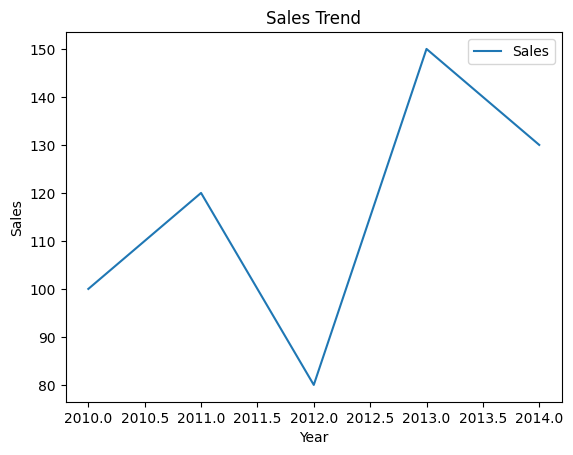

In [147]:
import pandas as pd

data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Sales': [100, 120, 80, 150, 130]
}
df = pd.DataFrame(data)

print("DataFrame:")
print(df)

# Creating a line plot
df.plot(kind='line', x='Year', y='Sales', title='Sales Trend', xlabel='Year', ylabel='Sales')

DataFrame:
  Category  Value
0        A     25
1        B     30
2        C     40
3        D     20


<Axes: title={'center': 'Category-wise Value'}, xlabel='Category'>

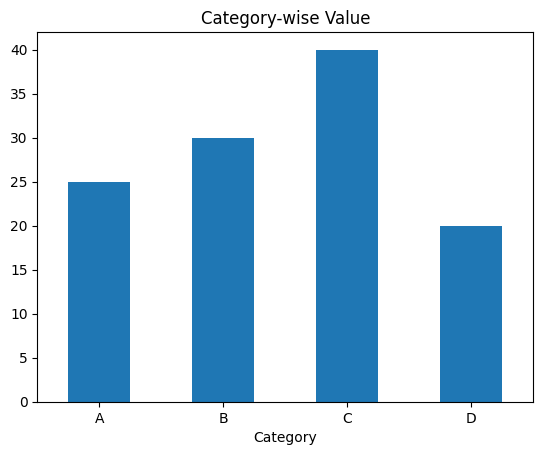

In [148]:
import pandas as pd

data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [25, 30, 40, 20]
}
df = pd.DataFrame(data)

print("DataFrame:")
print(df)

# Creating a bar plot
df.plot(kind='bar', x='Category', y='Value', title='Category-wise Value', legend=False, rot=0)

# to_datetime()

The `to_datetime()` function in Pandas is used to convert a column or an entire DataFrame to a `datetime64` data type. 
- It is especially useful when working with time series data or when you need to parse date and time information from strings into a more structured datetime format.

In [15]:
import pandas as pd

# Sample DataFrame with date strings
data = {
    'Date': ['2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04'],
    'Value': [10, 20, 30, 40]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

print(df['Date'].dtype)

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

print("\nDataFrame after converting 'Date' column to datetime:")
df



Original DataFrame:
         Date  Value
0  2023-07-01     10
1  2023-07-02     20
2  2023-07-03     30
3  2023-07-04     40
object

DataFrame after converting 'Date' column to datetime:


,Date,Value
0,2023-07-01,10
1,2023-07-02,20
2,2023-07-03,30
3,2023-07-04,40


In [16]:
print("\nDataFrame after converting 'Date' column to datetime:")
print(df['Date'].dtype)


DataFrame after converting 'Date' column to datetime:
datetime64[ns]


In [17]:
df['year']=pd.DatetimeIndex(df.Date).year
df['month']=pd.DatetimeIndex(df.Date).month
df['day']=pd.DatetimeIndex(df.Date).day
df['weekday']=pd.DatetimeIndex(df.Date).weekday

df

,Date,Value,year,month,day,weekday
0,2023-07-01,10,2023,7,1,5
1,2023-07-02,20,2023,7,2,6
2,2023-07-03,30,2023,7,3,0
3,2023-07-04,40,2023,7,4,1


In [18]:
# we can do above thing this way also:

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday # Monday = 0, Sunday = 6
df['weekday_name'] = df['Date'].dt.day_name()  # Full weekday name
df['month_name'] = df['Date'].dt.month_name()  # Full month name

In [19]:
df.head(5)

,Date,Value,year,month,day,weekday,weekday_name,month_name
0,2023-07-01,10,2023,7,1,5,Saturday,July
1,2023-07-02,20,2023,7,2,6,Sunday,July
2,2023-07-03,30,2023,7,3,0,Monday,July
3,2023-07-04,40,2023,7,4,1,Tuesday,July


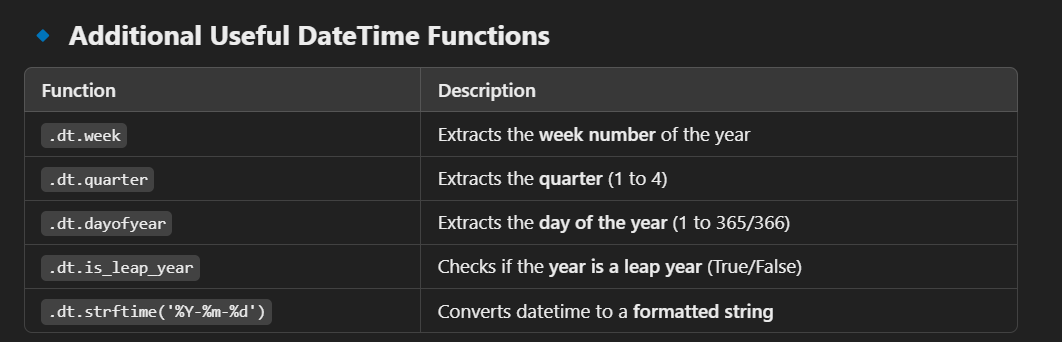

You can also specify the format of the date string using the `format` parameter if the date format is not automatically inferred:

In [186]:
# Create a sample DataFrame with a different date format
data = {'Date': ['01-01-2022', '02-01-2022', '03-01-2022'],
        'Value': [10, 15, 20]}

df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format with a specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Date,Value
0,2022-01-01,10
1,2022-01-02,15
2,2022-01-03,20


# assign()

The `assign()` method in pandas is used to create new columns or modify existing ones in a DataFrame by providing the column name and the values to be assigned. 
- It returns a new DataFrame with the added or modified columns, leaving the original DataFrame unchanged.

In [4]:

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)
print(df)

# Use assign() to create a new column 'Senior' based on the 'Age' column
df_with_new_column = df.assign(Senior=lambda x: x['Age'] >= 30)
df_with_new_column

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22


,Name,Age,Senior
0,Alice,25,False
1,Bob,30,True
2,Charlie,22,False


You can also use `assign()` to modify existing columns or create multiple new columns at once:

In [6]:
# Update 'Age' by adding 5 years
updated_df = df.assign(Age=df['Age'] + 5)
updated_df

,Name,Age
0,Alice,30
1,Bob,35
2,Charlie,27


In [7]:
# Use assign() to modify existing columns and create a new one
df_modified = df.assign(Age_plus_2=lambda x: x['Age'] + 2, Name_upper=lambda x: x['Name'].str.upper())
df_modified

,Name,Age,Age_plus_2,Name_upper
0,Alice,25,27,ALICE
1,Bob,30,32,BOB
2,Charlie,22,24,CHARLIE


# insert()

The `insert()` method is used to add a new column at a specific position in a Pandas DataFrame.

**Syntax:** `df.insert(loc, column, value, allow_duplicates=False)`

- `loc` (int) → The index (position) where the column should be inserted.
- `column` (str) → The name of the new column.
- `value` (array-like) → The values to be inserted (can be a list, Series, or scalar).
- `allow_duplicates` (bool) → If False, it prevents inserting duplicate column names.

In [25]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Insert column 'C' at index 1
df.insert(1, 'C', [10, 20, 30])
df

,A,C,B
0,1,10,4
1,2,20,5
2,3,30,6


In [26]:
# Inserting a Column with a Constant Value

df.insert(2, 'D', 100)
df

,A,C,D,B
0,1,10,100,4
1,2,20,100,5
2,3,30,100,6


In [27]:
# By default, insert() does not allow duplicate column names. If you try to insert a column with the same name:

df.insert(1, 'C', [100, 200, 300]) # ERROR

ValueError: cannot insert C, already exists

In [28]:
df.insert(1, 'C', [100, 200, 300], allow_duplicates=True)
df

,A,C,C,D,B
0,1,100,10,100,4
1,2,200,20,100,5
2,3,300,30,100,6


# astype()

The `astype()` method in pandas is used to change the data type of a column or the entire DataFrame. 
- It allows you to explicitly convert the data type of a Series or DataFrame to a specified type, such as changing numerical values to integers, floats, or converting strings to datetime objects.
- The `astype()` method returns a new DataFrame with the specified data types, leaving the original DataFrame unchanged.

In [188]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Check the data types before conversion
print("Data types before conversion:")
print(df.dtypes)

# Convert the 'Age' column to float
df['Age'] = df['Age'].astype(float)

# Check the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

Data types before conversion:
Name    object
Age      int64
dtype: object

Data types after conversion:
Name     object
Age     float64
dtype: object


In [189]:
# Convert multiple columns to different data types
df = df.astype({'Name': str, 'Age': float})

# select_dtypes()

The `select_dtypes()` method is used to filter columns in a DataFrame based on their data types (dtype). It allows you to select only numeric columns, categorical columns, or specific data types.

`df.select_dtypes(include=None, exclude=None)`

- `include` - Data types to keep (e.g., 'number', 'object', 'category').
- `exclude` - Data types to drop (opposite of include).

In [7]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000],
    'City': ['NY', 'LA', 'SF']
})

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
numeric_df

,Age,Salary
0,25,50000
1,30,60000
2,35,70000


In [8]:
string_df = df.select_dtypes(include='object')
string_df

,Name,City
0,Alice,NY
1,Bob,LA
2,Charlie,SF


In [9]:
non_numeric_df = df.select_dtypes(exclude='number')
non_numeric_df

,Name,City
0,Alice,NY
1,Bob,LA
2,Charlie,SF


In [10]:
df['Joining Date'] = pd.to_datetime(['2022-01-01', '2021-05-15', '2020-07-30'])

# Select only numeric and datetime columns
df_selected = df.select_dtypes(include=['number', 'datetime'])
df_selected

,Age,Salary,Joining Date
0,25,50000,2022-01-01
1,30,60000,2021-05-15
2,35,70000,2020-07-30


In [11]:
df_excluded = df.select_dtypes(exclude=['object', 'datetime'])
df_excluded

,Age,Salary
0,25,50000
1,30,60000
2,35,70000


In [12]:
df['Department'] = pd.Categorical(['HR', 'IT', 'Finance'])

# Select only categorical columns
df_categorical = df.select_dtypes(include='category')
df_categorical

,Department
0,HR
1,IT
2,Finance


In [13]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Department  3 non-null      category
dtypes: category(1)
memory usage: 263.0 bytes


# Categorical()

The `pd.Categorical()` function in Pandas is used to create categorical data, which is a more memory-efficient way to store and process repetitive text data (like categories or labels). It is mainly used for ordered or unordered categorical variables.

`pd.Categorical(values, categories=None, ordered=False)`
- `values`: List, array, or Series of categorical values.
- `categories`: (Optional) Defines possible categories. If not given, unique values from values are used.
- `ordered`: (Optional) If True, treats categories as ordered (useful for ranking). Default is False.

In [14]:
data = ['Red', 'Green', 'Blue', 'Red', 'Green']
cat_data = pd.Categorical(data) 

cat_data # Pandas automatically detects 3 unique categories: 'Blue', 'Green', 'Red'

['Red', 'Green', 'Blue', 'Red', 'Green']
Categories (3, object): ['Blue', 'Green', 'Red']

In [15]:
# Defining Custom Categories

cat_data = pd.Categorical(['Red', 'Green', 'Blue', 'Red'], categories=['Red', 'Green', 'Blue', 'Yellow'])

cat_data # Even though 'Yellow' is not in the data, it remains a possible category.

['Red', 'Green', 'Blue', 'Red']
Categories (4, object): ['Red', 'Green', 'Blue', 'Yellow']

In [16]:
# Creating Ordered Categories

grades = pd.Categorical(['Good', 'Average', 'Poor', 'Good', 'Excellent'],
                        categories=['Poor', 'Average', 'Good', 'Excellent'], 
                        ordered=True)

grades
# The categories are defined in a specific order (Poor < Average < Good < Excellent).
# This allows sorting and comparison based on rank.

['Good', 'Average', 'Poor', 'Good', 'Excellent']
Categories (4, object): ['Poor' < 'Average' < 'Good' < 'Excellent']

# Difference Between object dtype and category dtype in Pandas

**object dtype:**
- Stores data as raw strings (text).
- Uses more memory because each value is stored as a full Python string.
- Slower operations (comparisons, grouping, sorting, filtering) since it works with full strings.
- Flexible: Can hold any type of data (mixed strings, numbers, etc.).

In [18]:
df = pd.DataFrame({'City': ['New York', 'Los Angeles', 'Chicago', 'New York']})
df.dtypes

City    object
dtype: object

**category dtype:**
- Stores data as integer codes mapped to unique category labels.
- Uses less memory since it stores unique values only once and refers to them with integer codes.
- Faster operations (sorting, grouping, filtering) because it works with numbers internally.
- Can be ordered (ordered=True), allowing meaningful comparisons.

In [19]:
df['City'] = df['City'].astype('category')
df.dtypes

City    category
dtype: object

In [20]:
print(df.memory_usage(deep=True))

Index    128
City     309
dtype: int64


In [21]:
# How category Works Internally

df = pd.DataFrame({'City': ['New York', 'Los Angeles', 'Chicago', 'New York']})
df['City'] = df['City'].astype('category')
print(df['City'].cat.codes)  # Show integer codes

# Internally, category stores these integer codes instead of full strings, reducing memory usage.

0    2
1    1
2    0
3    2
dtype: int8


**When to Use Which?**

✔ Use object dtype when:
- You have free-text data (names, addresses, descriptions).
- You have a mix of different types (strings and numbers).

✔ Use category dtype when:
- You have a limited number of unique values (e.g., cities, job titles, product categories).
- You want to reduce memory usage.
- You need faster operations like grouping, sorting, and filtering.


# count()

The `count()` method in pandas is used to count the number of non-null (non-missing) values in each column of a DataFrame. 
- It can be applied to the entire DataFrame or a specific column.

In [190]:
# Create a sample DataFrame with missing values
data = {'Name': ['Alice', 'Bob', None, 'David', 'Eva'],
        'Age': [25, 30, None, 28, 22],
        'Salary': [50000, 60000, 75000, None, 65000]}

df = pd.DataFrame(data)

# Count non-null values in each column
column_counts = df.count()
column_counts

Name      4
Age       4
Salary    4
dtype: int64

# cut()

The `cut()` function in pandas is used for binning or categorizing numerical data into discrete intervals or bins. 
- It is commonly used when you want to convert a continuous variable into categorical data by grouping the values into specified ranges.

In [1]:
import pandas as pd

In [3]:
# Create a sample DataFrame with numerical data
data = {'Age': [22, 35, 47, 19, 55, 30, 28, 40, 60, 65, 51]}
df = pd.DataFrame(data)

# Define bins and labels for age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']

# Use cut() to categorize the 'Age' column into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print("DataFrame with 'Age_Group' column:")
df

DataFrame with 'Age_Group' column:


,Age,Age_Group
0,22,18-30
1,35,31-40
2,47,41-50
3,19,18-30
4,55,51-60
5,30,31-40
6,28,18-30
7,40,41-50
8,60,61-70
9,65,61-70


- `bins`: The intervals defining the bins. In this case, [18, 30, 40, 50, 60, 70] defines five age groups.
- `labels`: The labels for the resulting categories. Here, ['18-30', '31-40', '41-50', '51-60', '61-70'] represents the labels for the corresponding age groups.
- `right=False` parameter indicates that the intervals are left-closed (inclusive on the left) and right-open (exclusive on the right).

You can also specify the number of `bins` directly using the bins parameter without specifying custom labels:

In [5]:
# Use cut() with a specified number of bins
df['Age_Group'] = pd.cut(df['Age'], bins=5, labels=False)

print("DataFrame with 'Age_Group' column (using bins without labels):")
df

DataFrame with 'Age_Group' column (using bins without labels):


,Age,Age_Group
0,22,0
1,35,1
2,47,3
3,19,0
4,55,3
5,32,1
6,28,0
7,40,2
8,60,4
9,65,4


# iterrows()

The `iterrows()` method in pandas is used to iterate over the rows of a DataFrame as pairs of (index, Series). 
- It returns an iterator that produces pairs of index and pandas Series for each row in the DataFrame.

In [160]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Iterate over rows using iterrows()
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['Name']}, Age: {row['Age']}")

Index: 0, Name: Alice, Age: 25
Index: 1, Name: Bob, Age: 30
Index: 2, Name: Charlie, Age: 22


**It's important to note that while iterrows() is convenient for iteration, it may not be the most efficient way to perform operations on large DataFrames.** 
- For more efficient operations, consider using vectorized operations or the `apply()` function.

Here's an example of using `apply()` as an alternative to `iterrows()`:

In [161]:
# Use apply() to achieve the same result
def print_row(row):
    print(f"Index: {row.name}, Name: {row['Name']}, Age: {row['Age']}")

df.apply(print_row, axis=1) # axis=1 to iterate over the rows

Index: 0, Name: Alice, Age: 25
Index: 1, Name: Bob, Age: 30
Index: 2, Name: Charlie, Age: 22


0    None
1    None
2    None
dtype: object

When you use `df.apply(print_row, axis=1)`, Pandas applies the function row-wise (because `axis=1`). Each row is passed as a Pandas Series, and every Pandas Series has an index.

`row.name` Represents the Index of the Row. When apply() processes each row, Pandas automatically assigns the row index to `row.name`. This is because each row is treated as a Series, and the index of that Series is the row index of the DataFrame.

# query()

The `query()` method in pandas is used to filter rows of a DataFrame based on a specified condition. It allows you to write expressions in a query-like syntax to filter rows that satisfy a given condition.

In [191]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 30, 22, 28, 35],
        'Salary': [50000, 60000, 75000, 65000, 70000]}

df = pd.DataFrame(data)

# Use query() to filter rows based on a condition
filtered_df = df.query('Age > 25 and Salary > 60000')
filtered_df

,Name,Age,Salary
3,David,28,65000
4,Eva,35,70000


**While `query()` provides a convenient way to express conditions, it may not always be the most efficient option for large DataFrames or complex operations. For more complex operations, consider using boolean indexing or other methods that take advantage of pandas' vectorized operations.**

In [1]:
import pandas as pd
import numpy as np

# Creating a large DataFrame
np.random.seed(42)
df = pd.DataFrame({
    'A': np.random.randint(1, 100, 10**6),  # 1 million rows
    'B': np.random.rand(10**6) * 100
})

# Using query() (Slower)
filtered_df_query = df.query("A > 50 and B < 20")

# Using Boolean Indexing (Faster)
filtered_df_bool = df[(df["A"] > 50) & (df["B"] < 20)]


In [2]:
filtered_df_query

,A,B
3,72,1.757770
16,88,18.740148
20,64,7.664023
27,89,0.807013
37,62,1.437578
...,...,...
999959,58,6.241317
999972,77,11.813474
999985,79,9.326041
999986,84,12.501945


In [3]:
filtered_df_bool

,A,B
3,72,1.757770
16,88,18.740148
20,64,7.664023
27,89,0.807013
37,62,1.437578
...,...,...
999959,58,6.241317
999972,77,11.813474
999985,79,9.326041
999986,84,12.501945


# filter()

The `filter()` method is used to select specific rows or columns based on labels or conditions. It is primarily useful for filtering column names or index labels rather than filtering data values (for which query(), loc[], or boolean indexing are better suited).

**Syntax:** `df.filter(items=None, like=None, regex=None, axis=None)`
- `items` → List of specific column/row names to keep.
- `like` → Filters labels that contain a specific substring.
- `regex` → Filters labels that match a regex pattern.
- `axis` → 0 (rows) or 1 (columns); default is 1 (columns).

In [37]:
# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
})

# Keep only 'Name' and 'Age' columns
df_filtered = df.filter(items=['Name', 'Age'])
df_filtered

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [38]:
df_filtered = df.filter(like='a', axis=1) # Columns containing 'a' in their name ('Age', 'Salary') are kept.
df_filtered

,Name,Salary
0,Alice,50000
1,Bob,60000
2,Charlie,70000


In [39]:
df_filtered = df.filter(regex='^S', axis=1)  # Columns starting with 'S'
df_filtered

,Salary
0,50000
1,60000
2,70000


In [ ]:
# Filtering Rows Instead of Columns
# If you want to filter rows based on index labels, set axis=0:

df.index = ['row1', 'row2', 'row3']  # Set custom index
df_filtered = df.filter(items=['row1', 'row3'], axis=0) # Only rows with index labels 'row1' and 'row3' are selected.
df_filtered

# rename()

The `rename()` method in pandas is used to rename columns or index labels in a DataFrame. 
- It allows you to provide a mapping of current names to new names for columns or index labels.

In [6]:
# Create a sample DataFrame
data = {'Old_Name1': [1, 2, 3],
        'Old_Name2': [4, 5, 6]}

df = pd.DataFrame(data)

# Rename columns using rename()
df.rename(columns={'Old_Name1': 'New_Name1', 'Old_Name2': 'New_Name2'}, inplace=True)

print("DataFrame with renamed columns:")
df

DataFrame with renamed columns:


,New_Name1,New_Name2
0,1,4
1,2,5
2,3,6


### Rename Index Labels:

In [7]:
# Create a sample DataFrame with custom index labels
df = pd.DataFrame(data, index=['Row1', 'Row2', 'Row3'])

# Rename index labels using rename()
df.rename(index={'Row1': 'RowA', 'Row2': 'RowB', 'Row3': 'RowC'}, inplace=True)

print("DataFrame with renamed index labels:")
df


DataFrame with renamed index labels:


,Old_Name1,Old_Name2
RowA,1,4
RowB,2,5
RowC,3,6


### Rename Both Columns and Index Labels:

In [8]:
# Rename both columns and index labels using rename()
df.rename(columns={'Old_Name1': 'New_Name1', 'Old_Name2': 'New_Name2'},
          index={'Row1': 'RowA', 'Row2': 'RowB', 'Row3': 'RowC'}, inplace=True)

print("DataFrame with both renamed columns and index labels:")
df


DataFrame with both renamed columns and index labels:


,New_Name1,New_Name2
RowA,1,4
RowB,2,5
RowC,3,6


# shift()


The `shift()` method in Pandas is used to shift the values in a column or row up or down by a specified number of periods and along a specified axis.

- This operation is commonly used for time-series data or when comparing current values with previous or future values.
- The `shift()` method is useful for tasks such as calculating differences between consecutive values or comparing current values with past or future values in time-series data.

In [166]:
# Create a sample Series
data = {'Value': [10, 20, 30, 40, 50]}
series = pd.Series(data['Value'])

# Shift values in the Series by one position
shifted_series = series.shift(1)

print("Original Series:")
print(series)
print("\nShifted Series:")
print(shifted_series)

Original Series:
0    10
1    20
2    30
3    40
4    50
dtype: int64

Shifted Series:
0     NaN
1    10.0
2    20.0
3    30.0
4    40.0
dtype: float64


In [9]:
# Create a sample DataFrame
data = {'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Shift values in the DataFrame along the specified axis (default is axis=0, meaning along rows)
shifted_df = df.shift(2)

print("Original DataFrame:")
print(df)
print("\nShifted DataFrame:")
shifted_df

Original DataFrame:
   Value
0     10
1     20
2     30
3     40
4     50

Shifted DataFrame:


,Value
0,NaN
1,NaN
2,10.0
3,20.0
4,30.0


You can also specify the `periods` parameter to control the number of positions to shift. A negative value for `periods` will shift the values in the opposite direction.

In [168]:
# Shift values in the DataFrame by two positions
shifted_df_2 = df.shift(periods=2)

print("Shifted DataFrame by two positions:")
print(shifted_df_2)


Shifted DataFrame by two positions:
   Value
0    NaN
1    NaN
2   10.0
3   20.0
4   30.0


It is commonly used for time-series analysis, calculating differences, and lagging features.

In [4]:
# Creating a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2024-01-01', periods=5, freq='D'),
                   'Sales': [100, 200, 150, 300, 250]})

df['Previous Sales'] = df['Sales'].shift(1)  # Shift values down by 1 row
df

,Date,Sales,Previous Sales
0,2024-01-01,100,NaN
1,2024-01-02,200,100.0
2,2024-01-03,150,200.0
3,2024-01-04,300,150.0
4,2024-01-05,250,300.0


In [5]:
df['Next Sales'] = df['Sales'].shift(-1)  # Shift values up by 1 row
df

,Date,Sales,Previous Sales,Next Sales
0,2024-01-01,100,NaN,200.0
1,2024-01-02,200,100.0,150.0
2,2024-01-03,150,200.0,300.0
3,2024-01-04,300,150.0,250.0
4,2024-01-05,250,300.0,NaN


In [6]:
# Filling Missing Values
df['Previous Sales Filled'] = df['Sales'].shift(1, fill_value=0)  # Fill NaN with 0
df

,Date,Sales,Previous Sales,Next Sales,Previous Sales Filled
0,2024-01-01,100,NaN,200.0,0
1,2024-01-02,200,100.0,150.0,100
2,2024-01-03,150,200.0,300.0,200
3,2024-01-04,300,150.0,250.0,150
4,2024-01-05,250,300.0,NaN,300


In [7]:
# Shifting Columns (axis=1)
df_shifted = df.shift(periods=1, axis=1)
df_shifted

,Date,Sales,Previous Sales,Next Sales,Previous Sales Filled
0,NaT,2024-01-01,100,NaN,200.0
1,NaT,2024-01-02,200,100.0,150.0
2,NaT,2024-01-03,150,200.0,300.0
3,NaT,2024-01-04,300,150.0,250.0
4,NaT,2024-01-05,250,300.0,NaN


# transform()

The `transform()` method in pandas is used to perform operations on groups of data within a DataFrame, allowing you to return a DataFrame with the same shape as the original, but with transformed values based on the grouping.

The `transform()` method in Pandas is used to apply a function to each group or each element of a DataFrame or Series while keeping the original shape. It is commonly used in grouped calculations, feature engineering, and normalization.

In [8]:
# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the mean within each group using transform()
df['Mean_Value'] = df.groupby('Category')['Value'].transform('mean')

print("Original DataFrame:")
df

Original DataFrame:


,Category,Value,Mean_Value
0,A,1,3.0
1,B,2,3.0
2,A,3,3.0
3,B,4,3.0
4,A,5,3.0


In this example, the transform('mean') operation is applied within each group defined by the 'Category' column. The resulting 'Mean_Value' column contains the mean value of each group. The transformed values are aligned with the original DataFrame based on the index.


In [9]:
# Define a custom transformation function
def custom_transform(x):
    return x * 2  # Double the values within each group

# Apply the custom transformation using transform()
df['Doubled_Value'] = df.groupby('Category')['Value'].transform(custom_transform)

print("DataFrame with Custom Transformation:")
df


DataFrame with Custom Transformation:


,Category,Value,Mean_Value,Doubled_Value
0,A,1,3.0,2
1,B,2,3.0,4
2,A,3,3.0,6
3,B,4,3.0,8
4,A,5,3.0,10


**The `transform()` method is powerful for performing group-wise operations while maintaining the original structure of the DataFrame. It's commonly used in combination with `groupby()` for tasks such as filling missing values with group means or applying custom transformations within each group.**

# where()

The `where()` method in pandas is used to perform conditional element-wise replacement on a DataFrame or a Series. 
- It is often used to replace values in a DataFrame based on a specified condition.

In [10]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Use where() to replace values in the 'Age' column based on a condition
df['Age'] = df['Age'].where(df['Age'] > 25, other=0)

print("DataFrame with replaced values using where():")
df

DataFrame with replaced values using where():


,Name,Age
0,Alice,0
1,Bob,30
2,Charlie,0


In this example, the where() method is applied to the 'Age' column to replace values with 0 where the condition df['Age'] > 25 is not met.

In [11]:
# Replace values in the 'Age' column with 'Young' or 'Old' based on the condition
df['Age_Label'] = df['Age'].where(df['Age'] > 25, other='Young').where(df['Age'] <= 25, other='Old')

print("DataFrame with replaced values using multiple conditions and where():")
df

DataFrame with replaced values using multiple conditions and where():


,Name,Age,Age_Label
0,Alice,0,Young
1,Bob,30,Old
2,Charlie,0,Young


- The `where()` method is versatile and can be used for various conditional replacements within a DataFrame or a Series.

The general syntax of `where()` is as follows:

`DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)`

- `cond`: The condition to be checked. If the condition is not met, values are replaced.
- `other`: The replacement value for values where the condition is not met (default is NaN).
- `inplace`: If True, modifies the DataFrame in place; if False (default), returns a new DataFrame.
- `axis`: The axis along which the condition is checked (0 for rows, 1 for columns).
- `level`: For DataFrames with MultiIndex, specifies the level for the condition check.
- `errors`: Specifies how to handle errors in the condition. Options include 'raise', 'coerce', and 'ignore'.
- `try_cast`: If True, attempts to cast the result to the original data type.

# mask()

The `mask(`) function in Pandas is used to replace values where a condition is True. It is the opposite of `where()`, which keeps values where the condition is True and replaces the rest.

**Syntax:** `df.mask(cond, other=np.nan, inplace=False, axis=None)`

- `cond` → A condition (boolean DataFrame/Series).
- `other` → Value to replace where cond is True (default: NaN).
- `inplace` → If True, modifies the DataFrame in place.
- `axis` → 0 (rows) or 1 (columns); default is element-wise.


In [40]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [10, 20, 30, 40],
    'B': [5, 15, 25, 35]
})

# Replace values greater than 20 with NaN
df_masked = df.mask(df > 20) # Values greater than 20 are replaced with NaN.
df_masked

,A,B
0,10.0,5.0
1,20.0,15.0
2,NaN,NaN
3,NaN,NaN


In [41]:
# Replacing Values with a Specific Number
df_masked = df.mask(df > 20, other=-1)
df_masked

,A,B
0,10,5
1,20,15
2,-1,-1
3,-1,-1


In [42]:
# Masking Based on a Condition from Another Column

df_masked = df.mask(df['A'] > 20, other=0)
df_masked

,A,B
0,10,5
1,20,15
2,0,0
3,0,0


In [43]:
# Masking Using a Boolean Condition

df_masked = df.mask(df % 2 == 0, other='Even')
df_masked

,A,B
0,Even,5
1,Even,15
2,Even,25
3,Even,35


# transpose()

The `transpose()` method in pandas is used to transpose the rows and columns of a DataFrame. Transposing essentially swaps the rows and columns, transforming columns into rows and vice versa.

In [12]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'Salary': [50000, 60000, 75000]}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Transpose the DataFrame
transposed_df = df.transpose()

print("\nTransposed DataFrame:")
transposed_df

Original DataFrame:
      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   22   75000

Transposed DataFrame:


,0,1,2
Name,Alice,Bob,Charlie
Age,25,30,22
Salary,50000,60000,75000


# replace()

The `replace()` method in pandas is used to replace values in a DataFrame or a Series with other values. It allows you to replace specified values or patterns with new values.

In [10]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'Salary': [50000, 60000, 75000]}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Replace a specific value in the 'Name' column
df['Name'].replace('Alice', 'Alicia', inplace=True)

# Replace values in the 'Age' column based on a condition
df['Age'].replace({25: 26, 30: 31}, inplace=True)

# Replace all occurrences of a value in the entire DataFrame
df.replace(75000, 80000, inplace=True)

print("\nDataFrame after using replace():")
df

Original DataFrame:
      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   22   75000

DataFrame after using replace():


C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_10508\1749401586.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].replace('Alice', 'Alicia', inplace=True)
C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_10508\1749401586.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,Name,Age,Salary
0,Alicia,26,50000
1,Bob,31,60000
2,Charlie,22,80000


The `replace()` method is quite flexible and can handle various replacement scenarios. Some important points to note:

- You can use a scalar value, a dictionary, or another DataFrame/Series for replacement.
- The `inplace=True` parameter modifies the original DataFrame in place. If inplace=False or not specified, a new DataFrame with replacements is returned.
- You can use regular expressions for pattern-based replacements.

In [11]:
# Replace values in the 'Name' column using a regular expression
df['Name'].replace(regex=r'^[Aa]', value='New_', inplace=True)

print("DataFrame after using regex-based replace():")
df


DataFrame after using regex-based replace():


C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_10508\863218466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].replace(regex=r'^[Aa]', value='New_', inplace=True)


,Name,Age,Salary
0,New_licia,26,50000
1,Bob,31,60000
2,Charlie,22,80000


# isin()

The `isin()` method in pandas is used to filter data frames. It returns a boolean series indicating whether each element in the Series or DataFrame is contained in the specified values.
- The `isin()` method is useful for filtering and identifying rows or elements that match specified values, making it easier to perform conditional operations on DataFrames.

In [12]:
# Create a sample Series
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Check if values in the 'Name' column are in a specified list
name_filter = df['Name'].isin(['Alice', 'Charlie'])

print("Original DataFrame:")
print(df)

# Use the boolean series to filter the DataFrame
filtered_df = df[name_filter]

print("\nDataFrame after using isin() with Series:")
filtered_df

Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22

DataFrame after using isin() with Series:


,Name,Age
0,Alice,25
2,Charlie,22


In [13]:
# Create another DataFrame with additional data
additional_data = {'Name': ['David', 'Eva'],
                   'Age': [28, 35]}

additional_df = pd.DataFrame(additional_data)

# Check if rows in the DataFrame are in another DataFrame
df_filter = df.isin(additional_df)

print("Original DataFrame:")
print(df)

print("\nBoolean DataFrame after using isin() with DataFrame:")
df_filter

Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22

Boolean DataFrame after using isin() with DataFrame:


,Name,Age
0,False,False
1,False,False
2,False,False


# String operation

In [44]:
df = pd.DataFrame({'Name': ['Alice', 'BOB', 'Charlie']})
df['Lowercase'] = df['Name'].str.lower()
df

,Name,Lowercase
0,Alice,alice
1,BOB,bob
2,Charlie,charlie


In [45]:
df['Uppercase'] = df['Name'].str.upper()
df

,Name,Lowercase,Uppercase
0,Alice,alice,ALICE
1,BOB,bob,BOB
2,Charlie,charlie,CHARLIE


In [46]:
df = pd.DataFrame({'Name': ['  Alice  ', '  Bob', 'Charlie  ']})
df['Trimmed'] = df['Name'].str.strip() # removes spaces from both ends.
df

# Use str.lstrip() or str.rstrip() for left or right only.

,Name,Trimmed
0,Alice,Alice
1,Bob,Bob
2,Charlie,Charlie


In [47]:
df = pd.DataFrame({'Text': ['I love Python', 'Python is great', 'I hate Python']})
df['Replaced'] = df['Text'].str.replace('Python', 'Pandas')
df

,Text,Replaced
0,I love Python,I love Pandas
1,Python is great,Pandas is great
2,I hate Python,I hate Pandas


In [48]:
df['Contains_Python'] = df['Text'].str.contains('Python')
df

,Text,Replaced,Contains_Python
0,I love Python,I love Pandas,True
1,Python is great,Pandas is great,True
2,I hate Python,I hate Pandas,True


In [49]:
df = pd.DataFrame({'Email': ['alice@example.com', 'bob@gmail.com', 'charlie@yahoo.com']})
df['Domain'] = df['Email'].str.extract(r'@([\w\.]+)')
df

,Email,Domain
0,alice@example.com,example.com
1,bob@gmail.com,gmail.com
2,charlie@yahoo.com,yahoo.com


In [50]:
df = pd.DataFrame({'Text': ['My number is 12345', 'Call me at 98765', 'No numbers here']})
df['Numbers'] = df['Text'].str.findall(r'\d+')
df

,Text,Numbers
0,My number is 12345,[12345]
1,Call me at 98765,[98765]
2,No numbers here,[]


In [51]:
df = pd.DataFrame({'Text': ['Python is awesome', 'I love Pandas', 'Data Science rocks']})
df['Split'] = df['Text'].str.split()
df

,Text,Split
0,Python is awesome,"[Python, is, awesome]"
1,I love Pandas,"[I, love, Pandas]"
2,Data Science rocks,"[Data, Science, rocks]"


### summary:

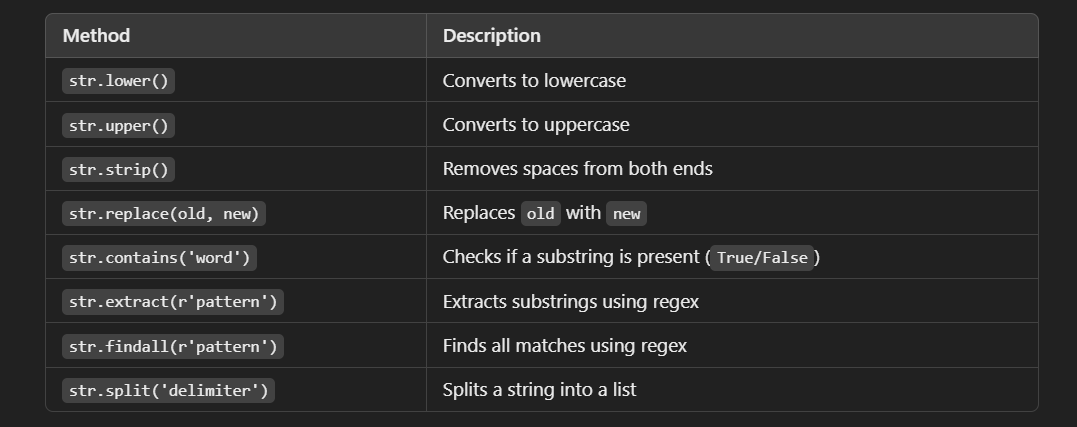